In [1]:
import os
import glob
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import re
import pickle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_pickle('../data_scraping/dedup_combined_df.pkl')
df.head(10)

,url,title,date,domain,stance,topic,is_AP,year,pretty_domain,month
0,www.buzzfeednews.com/article/tasneemnashrulla/...,"""eat the babies"" viral video at aoc town hall ...",2019-10-04 00:00:00,buzzfeed,pro,cc,None,2019.0,Buzzfeed,10.0
1,www.buzzfeednews.com/article/passantino/extrem...,"""extremely likely"" global warming is man-made,...",2013-09-27 00:00:00,buzzfeed,pro,cc,None,2013.0,Buzzfeed,9.0
2,shotofprevention.com/2010/11/03/history-makes-...,"""history"" makes headlines with launch of new w...",2020-03-13 14:32:02,https://shotofprevention/,pro,vax,False,2020.0,Shot of Prevention,3.0
3,www.buzzfeednews.com/article/andrewkaczynski/i...,"""it's global warming, stupid"" - buzzfeed news",2012-11-01 00:00:00,buzzfeed,pro,cc,None,2012.0,Buzzfeed,11.0
4,www.buzzfeednews.com/article/tasneemnashrulla/...,"""japan dropped an atomic bomb on america durin...",2014-02-24 00:00:00,buzzfeed,pro,cc,None,2014.0,Buzzfeed,2.0
5,www.buzzfeednews.com/article/llevin/opinion-im...,"""look at my record, child"": joe biden showed m...",2019-10-31 00:00:00,buzzfeed,pro,cc,None,2019.0,Buzzfeed,10.0
6,www.breitbart.com/politics/2019/06/14/orourke-...,"""president o'rourke will end oil and gas lease...",2019-06-14 00:00:00,breitbart,anti,cc,None,2019.0,Breitbart,6.0
7,www.buzzfeednews.com/article/andrewkaczynski/s...,smoking doesnt kill and other great old opeds ...,2015-03-31 00:00:00,buzzfeed,pro,cc,None,2015.0,Buzzfeed,3.0
8,www.foxnews.com/world/100-carbon-tax-by-2030-c...,"$100 carbon tax by 2030 could save climate, sa...",2017-05-29 00:00:00,fox,anti,cc,None,2017.0,Fox,5.0
9,childrenshealthdefense.org/news/4-billion-and-...,$4 billion and growing: u.s. payouts for vacc...,2018-11-19 00:00:00,chd,anti,vax,None,2018.0,Children's Health Defense,11.0


In [365]:
TOPICS = ['cc','vax','covid']
SIDES = ['pro','anti']

In [4]:
BLACKLIST_SUBJS = set(['that','one','this','percent','’s','some','many','those','other','“','who',
                      '—','which'])

In [433]:
good_quotes = pickle.load(open('../data_processing/good_coref_quotes.pkl','rb'))
covid_quotes = pickle.load(open('../data_processing/filtered_covid_quotes.pkl','rb'))
len(good_quotes),len(covid_quotes)

(434634, 223227)

In [434]:
all_quotes = good_quotes+covid_quotes
len(all_quotes)

657861

In [618]:
cc_quotes = [q for q in good_quotes if q['topic'] == 'cc']
vax_quotes = [q for q in good_quotes if q['topic'] == 'vax']
quotes_by_topic_side = {'cc':{'pro':[q for q in cc_quotes if q['stance']=='pro'],
                         'anti':[q for q in cc_quotes if q['stance']=='anti']},
                   'vax':{'pro':[q for q in vax_quotes if q['stance']=='pro'],
                         'anti':[q for q in vax_quotes if q['stance']=='anti']},
                   'covid':{'pro':[q for q in covid_quotes if q['stance']=='pro'],
                         'anti':[q for q in covid_quotes if q['stance']=='anti']}}

In [1]:
len(cc_quotes)

NameError: name 'cc_quotes' is not defined

In [177]:
quotes_per_year = defaultdict(list)
for q in good_quotes:
    y = df.loc[df.url == q['source']].year.values[0]
    quotes_per_year[y].append(q)

In [179]:
pickle.dump(quotes_per_year,open('quotes_per_year.pkl','wb'))

In [186]:
for year in quotes_per_year:
    if not np.isnan(year):
        print(year,len(quotes_per_year[year]))

2019.0 72916
2013.0 22811
2017.0 46641
2018.0 52289
2015.0 38027
2010.0 14066
2020.0 46177
2011.0 13405
2012.0 17074
2014.0 33307
2009.0 9629
2016.0 38855
2006.0 1976
2007.0 5854
2003.0 533
2005.0 681
2008.0 10054
1995.0 123
1972.0 21
1993.0 164
2000.0 265
2004.0 654
2001.0 505
1997.0 189
1986.0 15
1996.0 72
1977.0 9
1998.0 125
1992.0 40
1989.0 257
1990.0 202
2002.0 290
1991.0 160
1973.0 9
1985.0 1
1999.0 104
1983.0 49
1987.0 5
1988.0 29
1976.0 6
1979.0 31
1984.0 21
1994.0 19
1981.0 16
1982.0 6


In [44]:
good_quotes[0]

{'quote lemmas': ['climate', 'change', 'be', 'a', 'hoax'],
 'quote lemmas coref': ['climate', 'change', 'be', 'a', 'hoax'],
 'verb lemmas': ['believe'],
 'verb lemmas coref': ['believe'],
 'main verb lemma': 'believe',
 'main verb lemma coref': 'believe',
 'subject lemmas': ['the',
  'pro',
  '-',
  'Trump',
  'LaRouche',
  'PAC',
  ',',
  'which',
  'believe',
  ','],
 'subject lemmas coref': ['the',
  'pro',
  '-',
  'Trump',
  'LaRouche',
  'PAC',
  ',',
  'which',
  'believe',
  ','],
 'main subject lemma': 'PAC',
 'main subject lemma coref': 'PAC',
 'neg lemmas': None,
 'main neg lemma': None,
 'quote text': ['climate', 'change', 'is', 'a', 'hoax'],
 'verb text': ['believes'],
 'main verb text': 'believes',
 'subject text': ['the',
  'pro',
  '-',
  'Trump',
  'LaRouche',
  'PAC',
  ',',
  'which',
  'believes',
  ','],
 'main subject text': 'PAC',
 'is neg': None,
 'source': 'www.buzzfeednews.com/article/tasneemnashrulla/eat-babies-aoc-town-hall-pro-trump-troll-larouche'}

In [9]:
ent_fuzzy_map = pickle.load(open('named_entity_fuzzymatch_map.pkl','rb'))

### Clean superfluous whitespace

In [163]:
import re
re.sub("\s\s+",'','"   e&e')

'"e&e'

In [166]:
whitespace_cleaned_quotes = []
for q in good_quotes:
    for key in ['main verb lemma','main verb lemma coref','main subject lemma','main subject lemma coref']:
        if q[key] is not None:
            q[key] = re.sub("\s\s+",'',q[key])
    whitespace_cleaned_quotes.append(q)

In [167]:
pickle.dump(whitespace_cleaned_quotes,open('../data_processing/good_coref_quotes.pkl','wb'))

### Add outlet stance, topic fields to each quote

In [374]:
updated_quotes = []

In [375]:
for q in covid_quotes:
    if 'stance' not in q.keys():
        stance = get_src_attr(q['source'],'stance')
        topic = get_src_attr(q['source'],'topic')
        q.update({'stance':stance,'topic':topic})
    updated_quotes.append(q)

KeyboardInterrupt: 

In [361]:
len(covid_quotes),len(updated_quotes)

(434634, 434634)

In [371]:
len(covid_quotes),len(cc_quotes),len(vax_quotes)

(0, 400460, 34174)

In [58]:
pickle.dump(updated_quotes,open('../data_processing/good_coref_quotes.pkl','wb'))

### Fuzzy matching to collapse subj entities

In [10]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [70]:
ent_fuzzy_dict = defaultdict(list)

NAMED_ENTS = set(['ocasio-cortez','thunberg','bernie sanders','al gore','trump','obama','bill gates','hillary clinton',
             'bill clinton','william happer','e.p.a.','scott pruitt','bloomberg','elizabeth warren','george bush',
              'steve bannon','sarah palin','pete buttigieg','joe biden','mattis','george saunders',
              'sarah huckabee sanders','john mcphee','lindsey graham','bill mckibben',
              'tim dechristopher','gina mccarthy','marco rubio','david cameron','jeff bezos',
              'mother jones','new york times','scott morrison','adam frank','nancy pelosi',
              'naomi klein','alarmist','roy spencer','fox news','richard tol','john wiens','roy spencer',
              "beto o'rourke",'warmist','kenneth cook','ezra maes','prince harry','antonio guterres',
              'fbi','joaquin phoenix','greenie','green group','theblaze','tucker carlson',
              'accuweather','mick mulvaney','cory booker','mark petersen','john bbolton','james inhofe',
              'bob kopp','justin trudeau','rick perry','mcginnis','kirsten parris','tom quirk',
              'neil degrasse tyson','james hansen','democrats','republicans','paul ehrlich',
              'mike pompeo','leonardo dicaprio','melinda gates','nicholas drapela','cliff mass',
              'stephen hawking','james hansen','john christy','ketil isaksen','david ward','andrew wheeler',
              'daniel feldman','judith curry','sierra club','ethan siegel','michael mann',
              'matthew bunn','jim thomas','thomas sterner','aaron mair','christiana figueres','john watson',
              'laurence tribe','united nations'])
len(NAMED_ENTS)

93

In [71]:
# Make sure main_subjs_dict is up to date!

for ent in NAMED_ENTS:
    fuzzy_matches = [x[0] for x in process.extract(ent, 
                                                   list(Counter(main_subjs_dict['cc']['anti']).keys())+\
                                                   list(Counter(main_subjs_dict['cc']['pro']).keys()), limit=100) 
 if x[1] >= 85 and len(x[0])>=len(ent)][:30]
    ent_fuzzy_dict[ent] = fuzzy_matches

In [124]:
# Manually add 
# ent_fuzzy_dict['ocasio-cortez'].append('aoc')
# ent_fuzzy_dict['united nations'].extend(['the u.n.', 'the un', 'u.n.', 'un'])
# ent_fuzzy_dict['scott pruit'].append('mr. pruitt')
# ent_fuzzy_dict['trump'].append('donald trump')
ent_fuzzy_dict['bernie sanders'].append('mr. sanders')
ent_fuzzy_dict['bernie sanders'].append('sen. bernie sanders')
ent_fuzzy_dict['al gore'].append('mr. gore')
ent_fuzzy_dict['scott pruitt'].append('mr. pruitt')
ent_fuzzy_dict['obama'].append('mr. obama')
ent_fuzzy_dict['bill clinton'].append('mr. clinton')
ent_fuzzy_dict['joe biden'].append('mr. biden')
ent_fuzzy_dict['pete buttigieg'].append('mr. buttigieg')
ent_fuzzy_dict['bloomberg'].append('mike bloomberg')
ent_fuzzy_dict['bloomberg'].append('mr. bloomberg')

In [199]:
del ent_fuzzy_dict['e.p.a.']
ent_fuzzy_dict['e.p.a.'] = ['environmental protection agency','the e.p.a.']

In [207]:
new_epa_fuzzy_matches = []

In [208]:
for ent in ent_fuzzy_dict['e.p.a.'][:1]:#np.unique(ent_fuzzy_dict['trump']):#NAMED_ENTS:
    for year in main_subjs_dict:
        if not np.isnan(year):
            print(year)
            fuzzy_matches = [x[0] for x in process.extract(ent, 
                                                   list(Counter(main_subjs_dict[year]['cc']['anti']).keys())+\
                                                   list(Counter(main_subjs_dict[year]['cc']['pro']).keys()), 
                                                           limit=20) 
                if x[1] >= 85 and len(x[0])>=len(ent)][:30]
            new_epa_fuzzy_matches.extend(fuzzy_matches)

2019.0
2013.0
2017.0
2018.0
2015.0
2010.0
2020.0
2011.0
2012.0
2014.0
2009.0
2016.0
2006.0
2007.0
2003.0
2005.0
2008.0
1995.0
1972.0
1993.0
2000.0
2004.0
2001.0
1997.0
1986.0
1996.0
1977.0
1998.0
1992.0
1989.0
1990.0
2002.0
1991.0
1973.0
1985.0
1999.0
1983.0
1987.0
1988.0
1976.0
1979.0
1984.0
1994.0
1981.0
1982.0


In [209]:
len(new_epa_fuzzy_matches)#ent_fuzzy_dict['trump'].extend(new_trump_fuzzy_matches)

204

In [210]:
new_epa_fuzzy_matches = np.unique(new_epa_fuzzy_matches)
len(new_epa_fuzzy_matches)

137

In [211]:
new_epa_fuzzy_matches

array(['( pdf ) the center for integrative environmental research ( cier )',
       '-pron- environmental protection agency',
       '-pron- environmental protection agency ( epa )',
       '-pron- look at some of the reason people would give for join the lib dems – whether that be to do with environmental concern , social justice , or electoral reform or whatever –',
       '-pron- ’s worth note that this be not portman ’s first foray into environmental statism',
       '[ leadership in energy and environmental design ] certification',
       "a complaint with the agency on monnett 's behalf",
       'a number of city and various environmental group',
       'a recent report from the environmental consulting firm cleantech group',
       'a wonderful coalition of environmental group and concerned citizen',
       'act environmental protection agency chief andrew wheeler',
       'actor and environmental activist arnold schwarzenegger',
       'an environmental protection agency ( epa 

In [212]:
ent_fuzzy_dict['e.p.a.'].extend(new_epa_fuzzy_matches)

In [213]:
len(ent_fuzzy_dict['e.p.a.'])

139

In [114]:
#ent_fuzzy_dict['trump'] = np.unique([x for x in ent_fuzzy_dict['trump'] if 'trump' in x])

In [113]:
#len(np.unique(ent_fuzzy_dict['trump']))

111

In [214]:
ent_fuzzy_map = {}
for ent in NAMED_ENTS:
    ent_fuzzy_map.update(dict(zip(ent_fuzzy_dict[ent],[ent]*len(ent_fuzzy_dict[ent]))))

In [221]:
ent_fuzzy_map['greta thunberg'] = 'thunberg'

In [222]:
pickle.dump(ent_fuzzy_map,open('named_entity_fuzzymatch_map.pkl','wb'))

In [127]:
# Update main_subjs_dict with collapsed NEs
main_subjs_dict = defaultdict(dict)
for topic in TOPICS:
    for side in SIDES:
        main_subj_qs = [q for q in good_quotes 
                                        if q['main subject lemma coref'] is not None 
                                        and q['stance'] == side and 
                                        q['topic'] == topic]
        main_subjs_ = [x['main subject lemma coref'].lower() if x['main subject lemma coref'] != '-PRON-'
                      else x['main subject text'].lower() for x in main_subj_qs]
        main_subjs_ = [ent_fuzzy_map[x] if x in ent_fuzzy_map else x for x in main_subjs_]
        main_subjs_dict[topic][side] = main_subjs_

### Collapse 'hop' and 'hope'

In [141]:
hop_quotes = [q for q in good_quotes if q['main verb lemma'].lower() == 'hop']

In [142]:
len(hop_quotes)

328

In [143]:
hop_collapsed_quotes = []
for q in good_quotes:
    if q['main verb lemma'] == 'hop':
        #q['main verb lemma coref'] = 'hope'
        q['main verb lemma'] = 'hope'
        #q['verb lemmas'] = [v if v != 'hop' else 'hope' for v in q['verb lemmas']]
        #q['verb lemmas coref'] = [v if v != 'hop' else 'hope' for v in q['verb lemmas coref']]
    hop_collapsed_quotes.append(q)
len(good_quotes),len(hop_collapsed_quotes)

(434634, 434634)

In [144]:
pickle.dump(hop_collapsed_quotes,open('../data_processing/good_coref_quotes.pkl','wb'))

### Examine subjs whose main lemma is in BLACKLIST_SUBJS

In [13]:
# BLACKLIST_SUBJS = set(['it','that','one','this','percent','’s','some','many','those','other','“','who',
#                       '—','which'])
BLACKLIST_SUBJS = set(['that','one','this','percent','’s','some','many','those','other','“','who',
                      '—','which'])

In [129]:
blacklist_subj_quotes = defaultdict(dict)

In [130]:
for TOPIC in TOPICS:
    for SIDE in SIDES:
        main_subj_qs = [q for q in good_quotes 
                                        if q['main subject lemma coref'] is not None 
                                        and q['stance'] == SIDE and 
                                        q['topic'] == TOPIC]
        blacklist_subj_quotes[TOPIC][SIDE] = [q for q in main_subj_qs if q['main subject lemma coref'].lower() 
                                             in BLACKLIST_SUBJS or q['main subject text'].lower() in 
                                             BLACKLIST_SUBJS]

In [142]:
blacklist_subj_quotes['cc']['pro'][10]

{'quote lemmas': ['when', '-PRON-', 'be', 'young'],
 'quote lemmas coref': ['when', '-PRON-', 'be', 'young'],
 'verb lemmas': ['to', 'have'],
 'verb lemmas coref': ['to', 'have'],
 'main verb lemma': 'have',
 'main verb lemma coref': 'have',
 'subject lemmas': ['that', '’s'],
 'subject lemmas coref': ['that', '’s'],
 'main subject lemma': '’s',
 'main subject lemma coref': '’s',
 'neg lemmas': None,
 'main neg lemma': None,
 'quote text': ['when', 'you', '’re', 'young'],
 'verb text': ['to', 'have'],
 'main verb text': 'have',
 'subject text': ['That', '’s'],
 'main subject text': '’s',
 'is neg': None,
 'source': 'www.thenation.com/article/archive/if-we-wont-then-who-will-an-interview-with-chloe-maxmin/',
 'stance': 'pro',
 'topic': 'cc'}

I think I'm justified in excluding these: ''one would think'', ''some suspect that...'', ''this means'', ''that includes''...

# Helper scripts

In [619]:
BLACKLIST_VERBS = ['have','do','decide','direct','need','succeed','hee','carry','dump','mean','ensure','vary',
                  'map','compare','model','trace','increase','navigate','monitor','study','register','project',
                  'release','cause','investigate','quantify','continue','involve','conduct','flawed','cite',
                  'judge','label','provide','shut','effectively','treat','terrify','screen','simulate','echo',
                  'matter','tease','evolve','tip','approximate','reduce']

In [620]:
def get_src_attr(url,attr):
    return df.loc[df.url==url][attr].values[0]

In [621]:
def contains_el(x,el_set):
    if x is not None:
        return len(set(x).intersection(el_set)) > 0
    else:
        return False

In [649]:
def do_log_odds(g1,g2,g3=None,g4=None,ratios=True,blacklist_set=BLACKLIST_VERBS): # g1, g2 are both lists of tokens
    counted_g1 = Counter(g1)
    counted_g2 = Counter(g2)
    counted_g1 = {w: counted_g1[w] for w in counted_g1 if w not in blacklist_set}
    counted_g2 = {w: counted_g2[w] for w in counted_g2 if w not in blacklist_set}
    counted_g1.update({w: 0.5 for w in counted_g2 if w not in counted_g1})
    counted_g2.update({w: 0.5 for w in counted_g1 if w not in counted_g2})
    freqs_g1 = {w: counted_g1[w]/len(g1) for w in counted_g1}
    freqs_g2 = {w: counted_g2[w]/len(g2) for w in counted_g2}
    odds_g1 = {w: freqs_g1[w]/(1-freqs_g1[w]) for w in freqs_g1}
    odds_g2 = {w: freqs_g2[w]/(1-freqs_g2[w]) for w in freqs_g2}
    
    if ratios:
        log_odds_ratios = {w: np.log(odds_g1[w]/odds_g2[w]) for w in odds_g1}
        return log_odds_ratios
    else:
        #log_odds_g1 = {w: np.log(odds_g1[w]) for w in odds_g1}
        #log_odds_g2 = {w: np.log(odds_g2[w]) for w in odds_g2}
    
        return (odds_g1,odds_g2)

In [660]:
%matplotlib inline
def get_subj_df_over_time(subj_set,get_df=False):
    year_df,ent_df,side_df,odds_df,log_odds_df = [],[],[],[],[]
    for year in range(2006,2020):
        pro_main_subj_odds,anti_main_subj_odds = do_log_odds(main_subjs_dict[year]['cc']['pro'],
                                                         main_subjs_dict[year]['cc']['anti'],
                                                             ratios=False,blacklist_set=BLACKLIST_SUBJS)
        ents = [e for e in subj_set if e in pro_main_subj_odds]
        ent_df.extend(ents*2)
        year_df.extend([year]*len(ents)*2)
        side_df.extend(['pro']*len(ents)+['anti']*len(ents))
        pro_odds_ = [pro_main_subj_odds[e] for e in ents]
        anti_odds_ = [anti_main_subj_odds[e] for e in ents]
        odds_df.extend(pro_odds_+anti_odds_)
        log_odds_df.extend(list(np.log(pro_odds_))+list(np.log(anti_odds_)))
    ents_df_ = pd.DataFrame({"year":year_df,
                                    "ent":ent_df,
                                    "side":side_df,
                                    "odds":odds_df,
                                    "log_odds":log_odds_df})
    if get_df:
        return ents_df_
    fig,ax = plt.subplots(figsize=(13,9))
    sns.lineplot(x='year',y='odds',data=ents_df_,style="side",
             hue='ent',palette=sns.color_palette('bright', n_colors=len(subj_set)),ax=ax)

    
    
def get_subj_ratios_df_over_time(subj_set,get_df=False):
    year_df,ent_df,log_odds_df = [],[],[]
    for year in range(2006,2020):
        pro_anti_main_subj_odds = do_log_odds(main_subjs_dict[year]['cc']['pro'],
                                                         main_subjs_dict[year]['cc']['anti'],
                                              ratios=True,blacklist_set=BLACKLIST_SUBJS)
        ents = [e for e in subj_set if e in pro_anti_main_subj_odds]
        ent_df.extend(ents)
        year_df.extend([year]*len(ents))
        log_odds_ = [pro_anti_main_subj_odds[e] for e in ents]
        log_odds_df.extend(log_odds_)
    ents_df_ = pd.DataFrame({"year":year_df,
                                    "ent":ent_df,
                                    "log_odds":log_odds_df})
    fig,ax = plt.subplots(figsize=(13,9))
    sns.lineplot(x='year',y='log_odds',data=ents_df_,
             hue='ent',palette=sns.color_palette('bright', n_colors=len(subj_set)),ax=ax)
    ax.set_ylabel('LOR of being quoted in L- vs. R-leaning media',fontsize=20)
    
    if get_df:
        return ents_df_

# Common subjects

In [188]:
all_main_subjs = [x['main subject lemma coref'].lower() for x in good_quotes if x['main subject lemma coref'] 
                  is not None]
all_main_subjs = [ent_fuzzy_map[x] if x in ent_fuzzy_map else x for x in all_main_subjs]
counted_main_subjs = Counter(all_main_subjs)
sorted(counted_main_subjs.items(),key=lambda x:x[1],reverse=True)

[('-pron-', 64271),
 ('scientist', 6268),
 ('study', 5692),
 ('report', 4723),
 ('trump', 3719),
 ('people', 3659),
 ('researcher', 3602),
 ('that', 3372),
 ('official', 3312),
 ('expert', 2712),
 ('this', 2231),
 ('one', 1988),
 ('obama', 1965),
 ('company', 1727),
 ('group', 1647),
 ('percent', 1532),
 ('research', 1508),
 ('agency', 1394),
 ('’s', 1322),
 ('author', 1311),
 ('some', 1285),
 ('sanders', 1118),
 ('government', 1106),
 ('critic', 934),
 ('president', 915),
 ('analysis', 913),
 ('administration', 896),
 ('many', 851),
 ('poll', 826),
 ('team', 805),
 ('datum', 776),
 ('which', 760),
 ('other', 737),
 ('those', 731),
 ('court', 729),
 ('department', 723),
 ('analyst', 709),
 ('there', 701),
 ('environmentalist', 690),
 ('paper', 685),
 ('leader', 680),
 ('democrats', 670),
 ('country', 645),
 ('panel', 642),
 ('activist', 641),
 ('—', 639),
 ('change', 628),
 ('“', 593),
 ('who', 572),
 ('times', 570),
 ('model', 567),
 ('evidence', 559),
 ('survey', 554),
 ('pruitt', 55

Sources that each side quotes from the most:

In [223]:
main_subjs_dict = defaultdict(lambda: defaultdict(dict))
for year in quotes_per_year:
    year_quotes = quotes_per_year[year]
    for topic in TOPICS:
        for side in SIDES:
            main_subj_qs = [q for q in year_quotes 
                                            if q['main subject lemma coref'] is not None 
                                            and q['stance'] == side and 
                                            q['topic'] == topic]
            main_subjs_ = [x['main subject lemma coref'].lower() if x['main subject lemma coref'] != '-PRON-'
                          else x['main subject text'].lower() for x in main_subj_qs]
            main_subjs_ = [ent_fuzzy_map[x] if x in ent_fuzzy_map else x for x in main_subjs_]
            main_subjs_dict[year][topic][side] = main_subjs_

In [643]:
pro_main_subj_odds,anti_main_subj_odds = do_log_odds([x for x in main_subjs_dict['cc']['pro'] if x not in 
                                                      BLACKLIST_SUBJS],
                                                     [x for x in main_subjs_dict['cc']['anti'] if x not in 
                                                      BLACKLIST_SUBJS],ratios=False)

In [129]:
sorted(pro_main_subj_odds.items(),key=lambda x:x[1],reverse=True)

[('i', 0.0810058758639321),
 ('we', 0.04400650530948053),
 ('you', 0.030540281837653616),
 ('it', 0.026311177227473056),
 ('scientist', 0.017464454474180494),
 ('study', 0.0132690700677803),
 ('report', 0.012884336292146208),
 ('trump', 0.010582055124341253),
 ('people', 0.010428941786471836),
 ('official', 0.008374913898829023),
 ('researcher', 0.007575089914848435),
 ('expert', 0.007253825144635987),
 ('company', 0.00549052455240289),
 ('group', 0.00456074578654036),
 ('research', 0.0040986006206452374),
 ('agency', 0.003666250015676668),
 ('obama', 0.0033894054957684674),
 ('government', 0.0030330882352941177),
 ('author', 0.0029283371974016753),
 ('analysis', 0.0026225893476100196),
 ('critic', 0.0024886216543488246),
 ('administration', 0.002459320993582383),
 ('president', 0.0023923544859777964),
 ('poll', 0.00237979926184472),
 ('analyst', 0.002149675878966987),
 ('leader', 0.0020409270566826795),
 ('country', 0.0020032887323355843),
 ('there', 0.0019363831367737521),
 ('paper',

In [120]:
sorted(anti_main_subj_odds.items(),key=lambda x:x[1],reverse=True)

[('i', 0.060398092473564174),
 ('we', 0.040231872266856504),
 ('it', 0.02308507871731781),
 ('you', 0.022808859557022148),
 ('scientist', 0.01789268370352679),
 ('study', 0.015416993438098738),
 ('report', 0.014178630919330531),
 ('researcher', 0.011891100470895493),
 ('trump', 0.010931014034394148),
 ('official', 0.008329965201447145),
 ('people', 0.0075453112687155245),
 ('expert', 0.006256763403836694),
 ('group', 0.004438596146670071),
 ('agency', 0.0038471352582095117),
 ('author', 0.0037584761979529554),
 ('obama', 0.003630440755131677),
 ('research', 0.003453214825279102),
 ('company', 0.0030989506717662057),
 ('president', 0.002921912381848845),
 ('government', 0.002744936572358489),
 ('democrats', 0.002715446676273662),
 ('datum', 0.002607331895706724),
 ('critic', 0.002607331895706724),
 ('biden', 0.0025876771676697184),
 ('cortez', 0.002538543718819528),
 ('team', 0.002499240426929071),
 ('sanders', 0.0024795899365891425),
 ('environmentalist', 0.0024402912668933818),
 ('adm

In [131]:
pro_anti_main_subj_odds_ratios = do_log_odds([x for x in main_subjs_dict['cc']['pro'] if x not in 
                                                      BLACKLIST_SUBJS],
                                                     [x for x in main_subjs_dict['cc']['anti'] if x not in 
                                                      BLACKLIST_SUBJS])
sorted(pro_anti_main_subj_odds_ratios.items(),key=lambda x:x[1],reverse=True)

[('george saunders', 3.190054553099711),
 ('jim thomas', 3.058997127975756),
 ('adam frank', 2.975598855008509),
 ('ziska', 2.9081450763740606),
 ('bernhardt', 2.9081450763740606),
 ('shindell', 2.8846104130522714),
 ('a decorated navy pilot who be shoot down in the pacific in 1944',
  2.8846104130522714),
 ('fink', 2.8605086955789703),
 ('mabus', 2.835811917111713),
 ('hammami', 2.810489943267892),
 ('swain', 2.784510291022454),
 ('jerry brown', 2.784510291022454),
 ('homenuk', 2.784510291022454),
 ('inglis', 2.75783787811547),
 ('zaelke', 2.730434738119887),
 ('zuckerberg', 2.730434738119887),
 ('crist', 2.7022596953630753),
 ('barton', 2.6732679927170615),
 ('esvelt', 2.6732679927170615),
 ('simone landrum', 2.643410863811973),
 ('wara', 2.612635039407165),
 ('lackner', 2.5970060517363325),
 ('herzog', 2.5808821753718836),
 ('balash', 2.5808821753718836),
 ('archer', 2.5808821753718836),
 ('mae', 2.5808821753718836),
 ('george bush', 2.548088186845545),
 ('gina mccarthy', 2.54808818

In [132]:
sorted(pro_anti_main_subj_odds_ratios.items(),key=lambda x:x[1],reverse=False)

[('sen. bernie sanders ( i - vt )', -5.260741458623757),
 ('john bbolton', -5.073392944976562),
 ('alarmist', -4.567987186599088),
 ('green group', -4.437091170839647),
 ('peiser', -4.111570975676077),
 ('actress jane fonda', -4.07234048357589),
 ('kris', -4.07234048357589),
 ('montford', -3.9889393170299074),
 ('archbishop', -3.9889393170299074),
 ('roy spencer', -3.8979479815997418),
 ('easterbrook', -3.84914803896152),
 ('foxnews.com', -3.84914803896152),
 ('mckitrick', -3.797844966200797),
 ('blee', -3.797844966200797),
 ('harry', -3.7441117144785236),
 ("a ' rebound effect , ' as money save on cheap vegetarian food be spend on good and service that cause additional greenhouse - gas emission",
  -3.743767966652965),
 ('environmental economist richard tol', -3.743767966652965),
 ('evolutionary biologist john wiens of the university of arizona',
  -3.743767966652965),
 ('dr. roy spencer', -3.686761851528676),
 ("o'rourke", -3.6865997746310737),
 ('abstract', -3.6865997746310737),
 ('

Seems like R-wing cc media more likely to quote from high-profile activists that make for easy targets (AOC, Greta Thunberg) and also derogatory terms for environmentalists ("alarmists", "greenie", "green groups", "adherents"), and skeptics (william happer), 

In [141]:
subjs_to_plot = ['alarmist','green group','foxnews.com','fox news','warmist','alexandria ocasio - cortez',
                'greta thunberg','joaquin phoenix','pope francis','e.p.a.','greenie',
                'william happer','scientist','expert','researcher','study','naomi klein','bill mckibben',
                'al gore']

In [142]:
for x in subjs_to_plot:
    print(x,anti_main_subj_odds[x],pro_main_subj_odds[x])

alarmist 0.001203958380235506 1.2495678577825168e-05
green group 0.00035207823960880196 4.165191494678968e-06
foxnews.com 0.0001955684196116011 4.165191494678968e-06
fox news 6.844024677597552e-05 0.00018746797422107054
warmist 0.00015644861640754865 4.165191494678968e-06
alexandria ocasio - cortez 0.00014666914374553882 4.165191494678968e-06
greta thunberg 0.0006065111911097199 4.165347639914027e-05
joaquin phoenix 9.77660458522755e-06 4.165191494678968e-06
pope francis 0.0008219017240367115 0.00030415019186460737
e.p.a. 0.000361861729699068 0.0004959015197923048
greenie 8.799632370914283e-05 4.165191494678968e-06
william happer 0.0005869348306693014 8.33104229670174e-05
scientist 0.01789268370352679 0.017464454474180494
expert 0.006256763403836694 0.007253825144635987
researcher 0.011891100470895493 0.007575089914848435
study 0.015416993438098738 0.0132690700677803
naomi klein 1.955340033631849e-05 0.00010830625676914105
bill mckibben 9.777464898901012e-05 0.0002833120849269638
al go

In [267]:
ACTIVIST_ENTS = ['activist','environmentalist','alarmist','green group','warmist','thunberg',
                'joaquin phoenix','leonardo dicaprio','greenie','naomi klein','bill mckibben','al gore',
                'alexandria ocasio - cortez','denier','skeptic','e.p.a.']
SHORT_ACTIVIST_ENTS = ['activist','environmentalist','alarmist','green group','warmist','thunberg',
                      'greenie','al gore','alexandria ocasio - cortez']
SKEPTIC_ENTS = ['denier','skeptic']
EPA_ENTS = ['e.p.a.']
SCIENTIST_ENTS = ['scientist','researcher','climate scientist','climatologist','expert','physicist','economist',
          'professor','geophysicist','chemist','specialist','panel']
SCIENCE_ENTS = ['study','data','research','report','analysis','experiment']
activist_odds_df = pd.DataFrame({'subj':activist_ents*2,
                                'odds':[pro_main_subj_odds[x] for x in activist_ents]+\
                                 [anti_main_subj_odds[x] for x in activist_ents],
                                'side':['pro']*len(activist_ents)+['anti']*len(activist_ents)})
activist_odds_df['log_odds'] = np.log(activist_odds_df['odds'])

KeyError: 'green group'

In [170]:
activist_odds_ratios = {x: anti_main_subj_odds[x]/pro_main_subj_odds[x] for x in activist_ents}
activist_log_odds_ratios_df = pd.DataFrame({'subj':activist_ents,
                                           'odds_ratios':[activist_odds_ratios[x] for x in activist_ents],
                                           'log_odds_ratios':[np.log(activist_odds_ratios[x]) for x in activist_ents]})
activist_log_odds_ratios_df = activist_log_odds_ratios_df.sort_values(by='log_odds_ratios')

Text(0.5, 0, '')

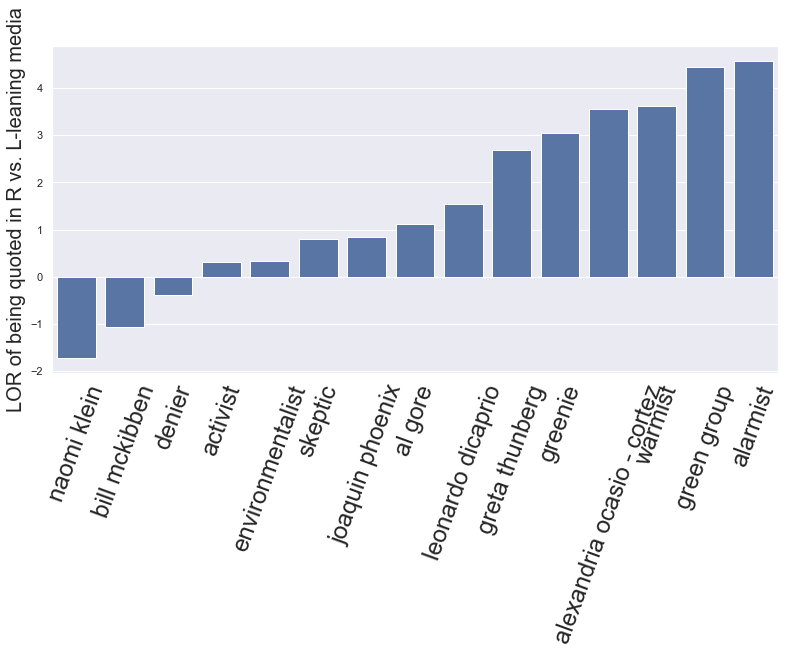

In [171]:
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x="subj", y="log_odds_ratios", data=activist_log_odds_ratios_df,ax=ax,color='b')
ax.set_xticklabels(activist_log_odds_ratios_df.subj.values,fontsize=24,rotation=70)
ax.set_ylabel('LOR of being quoted in R vs. L-leaning media',fontsize=20)
ax.set_xlabel("")

In [108]:
sorted(Counter(main_subjs_dict['vax']['pro']).items(),key=lambda x:x[1],reverse=True)

[('i', 3374),
 ('we', 1137),
 ('you', 779),
 ('it', 649),
 ('study', 392),
 ('official', 366),
 ('people', 334),
 ('parent', 334),
 ('expert', 257),
 ('doctor', 201),
 ('researcher', 169),
 ('that', 164),
 ('this', 153),
 ('scientist', 143),
 ('organization', 114),
 ('report', 113),
 ('one', 105),
 ('some', 99),
 ('’s', 98),
 ('vaccine', 84),
 ('department', 83),
 ('research', 80),
 ('child', 76),
 ('cdc', 74),
 ('trump', 71),
 ('datum', 62),
 ('mother', 62),
 ('percent', 61),
 ('woman', 60),
 ('group', 59),
 ('agency', 59),
 ('company', 56),
 ('family', 55),
 ('centers', 54),
 ('other', 54),
 ('many', 54),
 ('government', 51),
 ('c.d.c.', 51),
 ('those', 50),
 ('evidence', 47),
 ('who', 47),
 ('there', 45),
 ('authority', 44),
 ('critic', 43),
 ('survey', 43),
 ('w.h.o.', 43),
 ('committee', 42),
 ('article', 42),
 ('me', 41),
 ('which', 39),
 ('member', 38),
 ('have', 38),
 ('fauci', 38),
 ('author', 37),
 ('president', 37),
 ('frieden', 37),
 ('court', 36),
 ('everyone', 35),
 ('sal

In [109]:
sorted(Counter(main_subjs_dict['vax']['anti']).items(),key=lambda x:x[1],reverse=True)

[('study', 495),
 ('i', 406),
 ('we', 289),
 ('researcher', 281),
 ('it', 231),
 ('you', 186),
 ('author', 154),
 ('cdc', 126),
 ('this', 89),
 ('vaccine', 76),
 ('parent', 76),
 ('research', 73),
 ('official', 71),
 ('one', 61),
 ('people', 60),
 ('report', 59),
 ('scientist', 58),
 ('agency', 52),
 ('datum', 52),
 ('evidence', 49),
 ('that', 45),
 ('analysis', 43),
 ('kennedy', 43),
 ('doctor', 43),
 ('expert', 41),
 ('merck', 36),
 ('court', 35),
 ('government', 35),
 ('’s', 34),
 ('science', 34),
 ('fda', 34),
 ('child', 34),
 ('review', 33),
 ('the cdc', 32),
 ('article', 25),
 ('investigator', 25),
 ('committee', 25),
 ('“', 24),
 ('survey', 24),
 ('defense', 22),
 ('who', 22),
 ('thompson', 21),
 ('centers', 20),
 ('—', 19),
 ('%', 19),
 ('iom', 18),
 ('not', 18),
 ('group', 18),
 ('finding', 18),
 ('hotez', 18),
 ('there', 17),
 ('organization', 17),
 ('result', 17),
 ('number', 17),
 ('the fda', 17),
 ('company', 16),
 ('manufacturer', 16),
 ('which', 16),
 ('percent', 16),
 (

In [288]:
scientist_odds_df = pd.DataFrame({'subj':scientist_ents*2,
                                'odds':[pro_main_subj_odds[x] for x in scientist_ents]+\
                                 [anti_main_subj_odds[x] for x in scientist_ents],
                                'side':['pro']*len(scientist_ents)+['anti']*len(scientist_ents)})
scientist_odds_df['log_odds'] = np.log(scientist_odds_df['odds'])
scientist_odds_ratios = {x: anti_main_subj_odds[x]/pro_main_subj_odds[x] for x in scientist_ents}
scientist_log_odds_ratios_df = pd.DataFrame({'subj':scientist_ents,
                                           'odds_ratios':[scientist_odds_ratios[x] for x in scientist_ents],
                                           'log_odds_ratios':[np.log(scientist_odds_ratios[x]) for x in scientist_ents]})
scientist_log_odds_ratios_df = scientist_log_odds_ratios_df.sort_values(by='log_odds_ratios')

Text(0.5, 0, '')

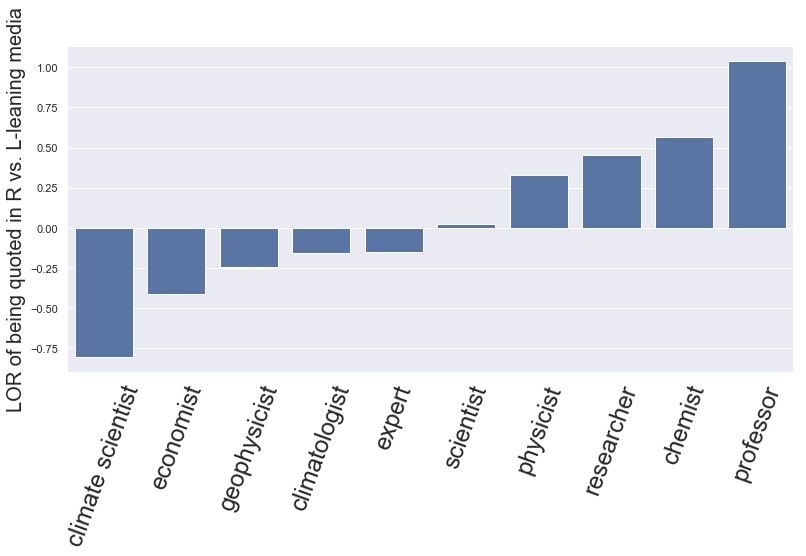

In [190]:
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x="subj", y="log_odds_ratios", data=scientist_log_odds_ratios_df,ax=ax,color='b')
ax.set_xticklabels(scientist_log_odds_ratios_df.subj.values,fontsize=24,rotation=70)
ax.set_ylabel('LOR of being quoted in R vs. L-leaning media',fontsize=20)
ax.set_xlabel("")

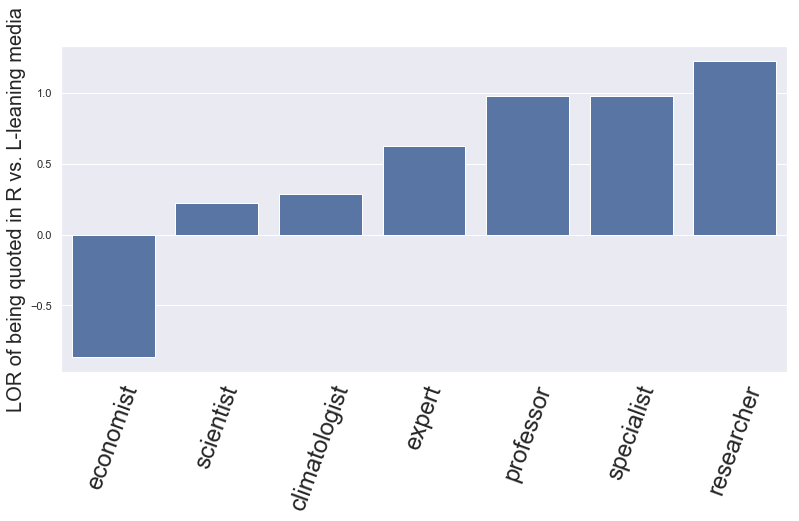

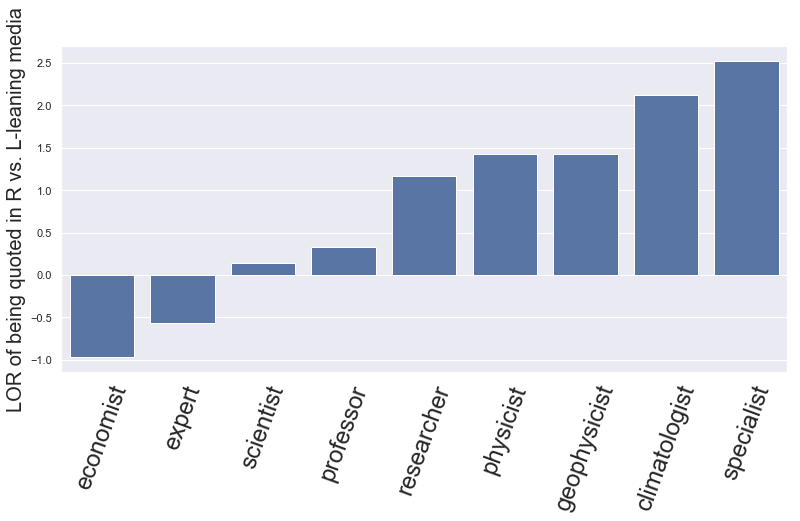

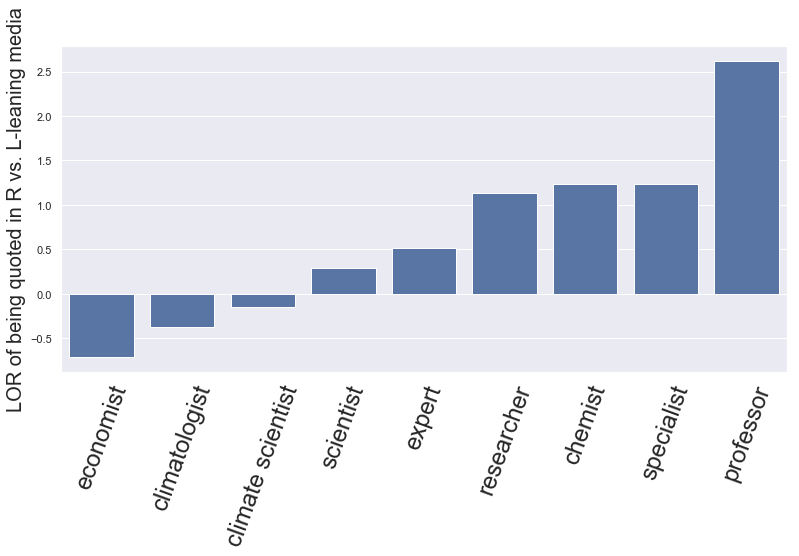

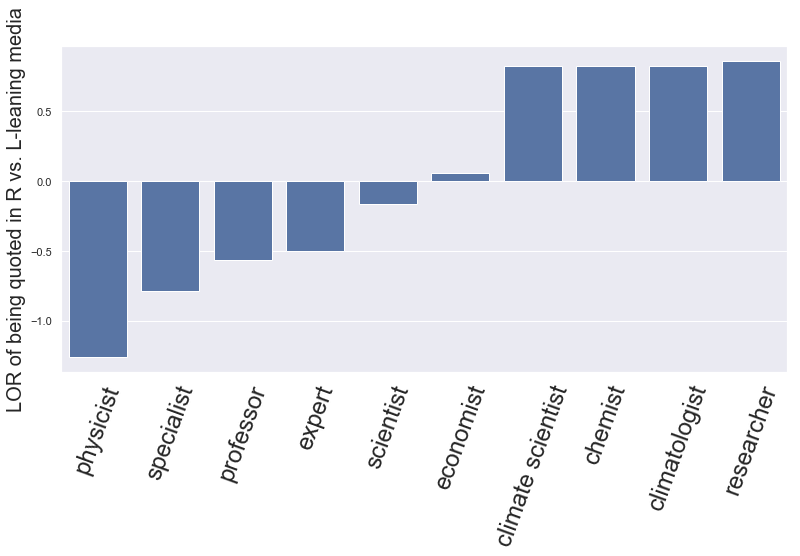

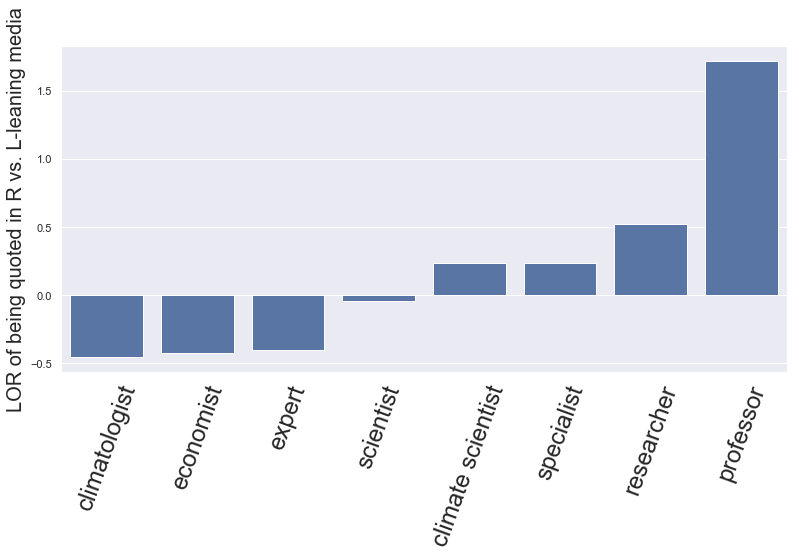

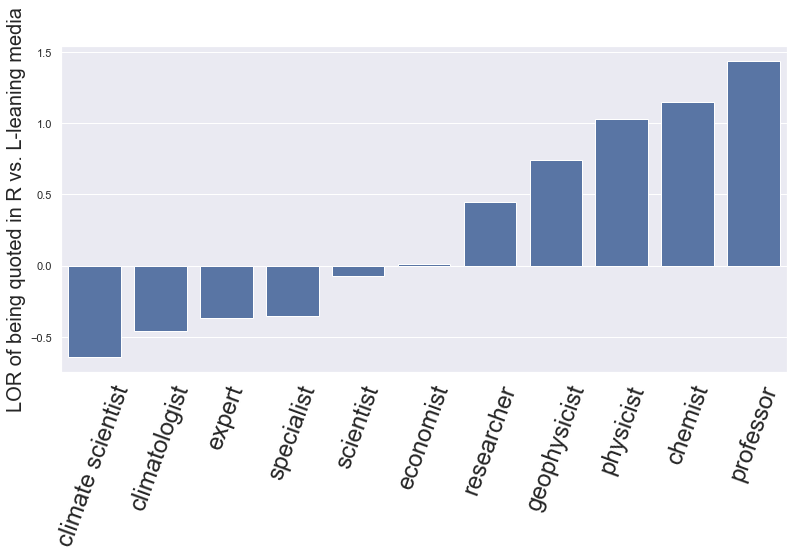

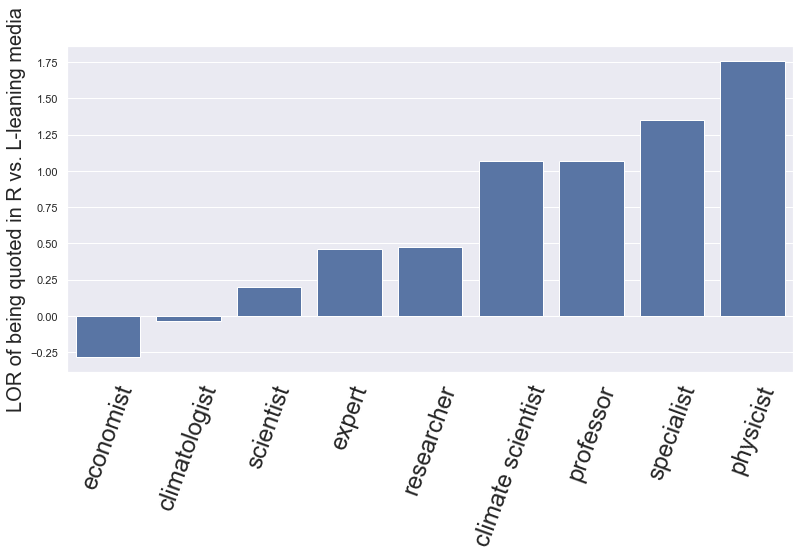

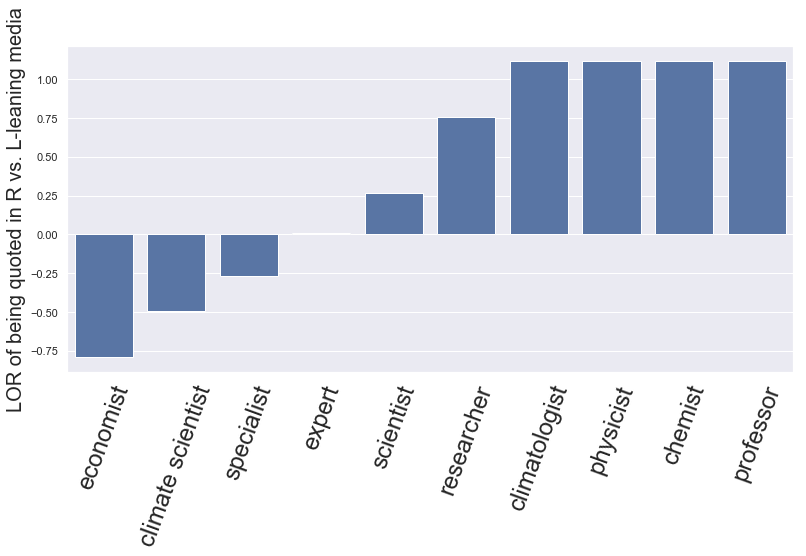

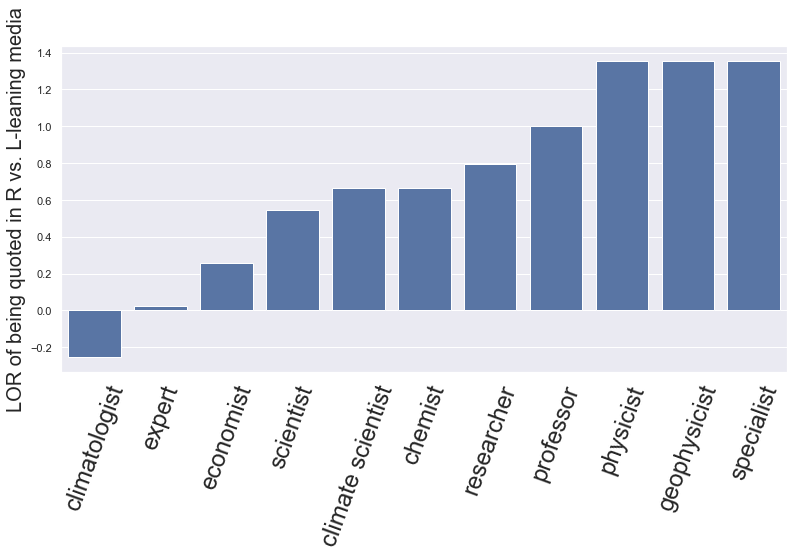

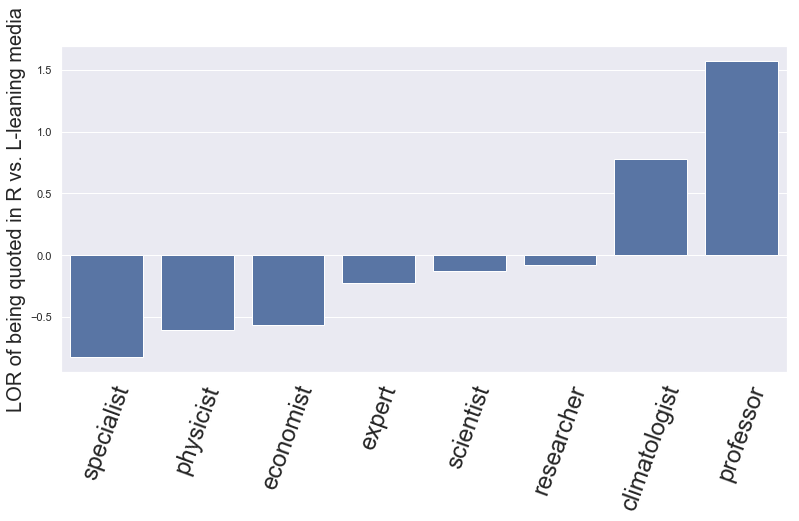

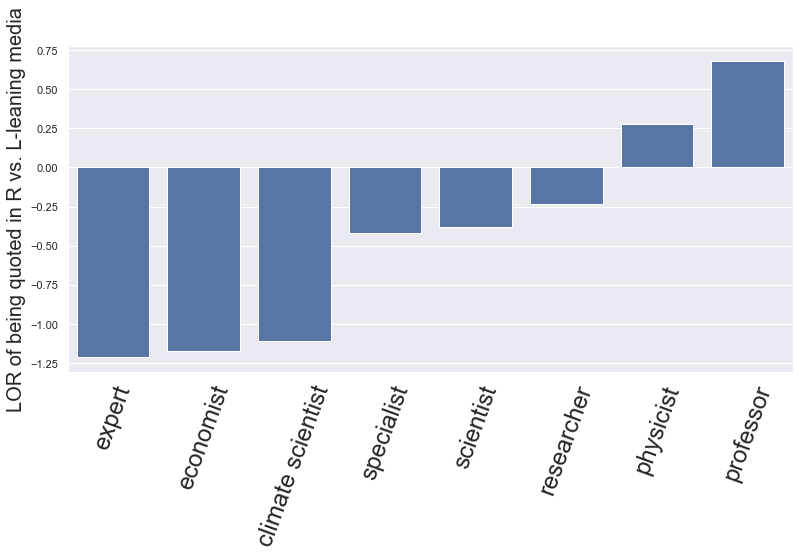

In [225]:
for year in range(2010,2021):
    pro_main_subj_odds,anti_main_subj_odds = do_log_odds([x for x in main_subjs_dict[year]['cc']['pro'] if x not in 
                                                      BLACKLIST_SUBJS],
                                                     [x for x in main_subjs_dict[year]['cc']['anti'] if x not in 
                                                      BLACKLIST_SUBJS],ratios=False)
    scientist_ents = [e for e in SCIENTIST_ENTS if e in pro_main_subj_odds]
    scientist_odds_df = pd.DataFrame({'subj':scientist_ents*2,
                                'odds':[pro_main_subj_odds[x] for x in scientist_ents]+\
                                 [anti_main_subj_odds[x] for x in scientist_ents],
                                'side':['pro']*len(scientist_ents)+['anti']*len(scientist_ents)})
    scientist_odds_df['log_odds'] = np.log(scientist_odds_df['odds'])
    scientist_odds_ratios = {x: anti_main_subj_odds[x]/pro_main_subj_odds[x] for x in scientist_ents}
    scientist_log_odds_ratios_df = pd.DataFrame({'subj':scientist_ents,
                                               'odds_ratios':[scientist_odds_ratios[x] for x in scientist_ents],
                                               'log_odds_ratios':[np.log(scientist_odds_ratios[x]) for x in scientist_ents]})
    scientist_log_odds_ratios_df = scientist_log_odds_ratios_df.sort_values(by='log_odds_ratios')
    fig,ax = plt.subplots(figsize=(13,6))
    sns.barplot(x="subj", y="log_odds_ratios", data=scientist_log_odds_ratios_df,ax=ax,color='b')
    ax.set_xticklabels(scientist_log_odds_ratios_df.subj.values,fontsize=24,rotation=70)
    ax.set_ylabel('LOR of being quoted in R vs. L-leaning media',fontsize=20)
    ax.set_xlabel("")

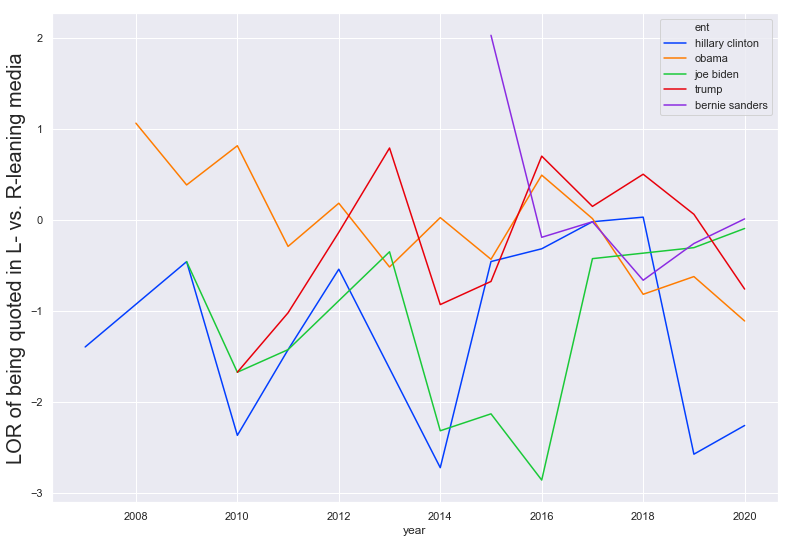

In [345]:
get_subj_ratios_df_over_time(['obama','trump','joe biden','bernie sanders','hillary clinton'])

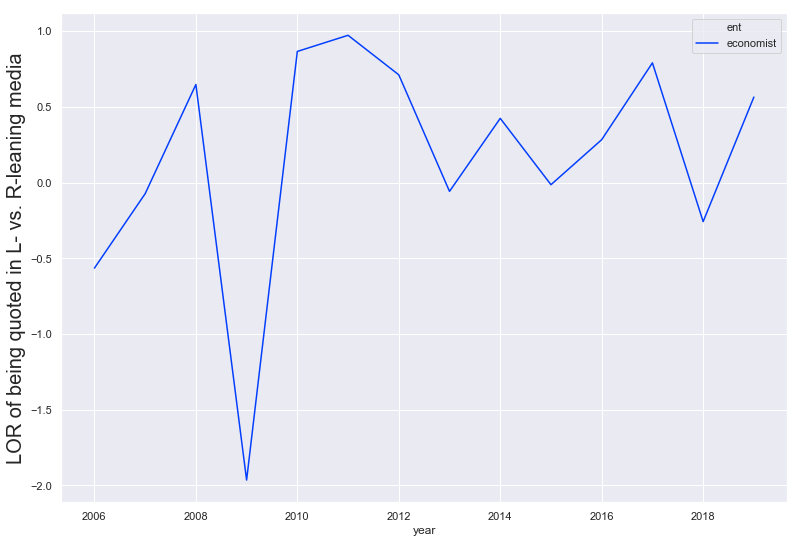

In [352]:
get_subj_ratios_df_over_time(['fox news','new york times'])

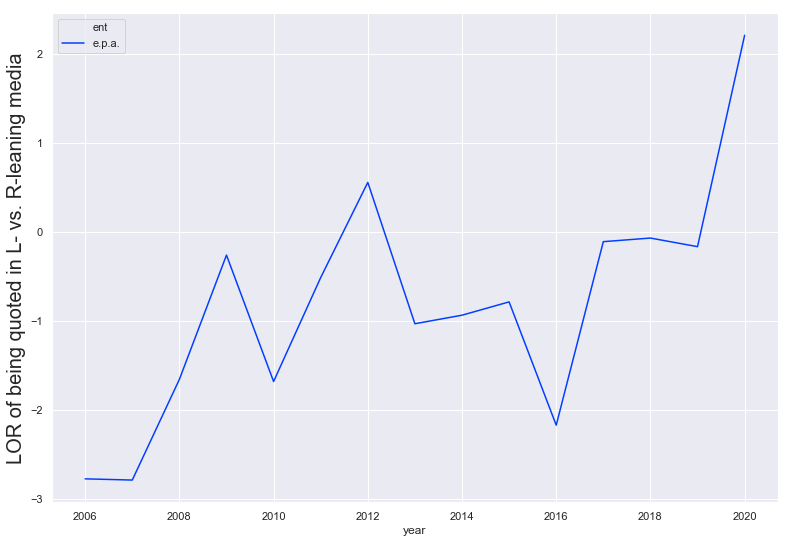

In [346]:
get_subj_ratios_df_over_time(EPA_ENTS)

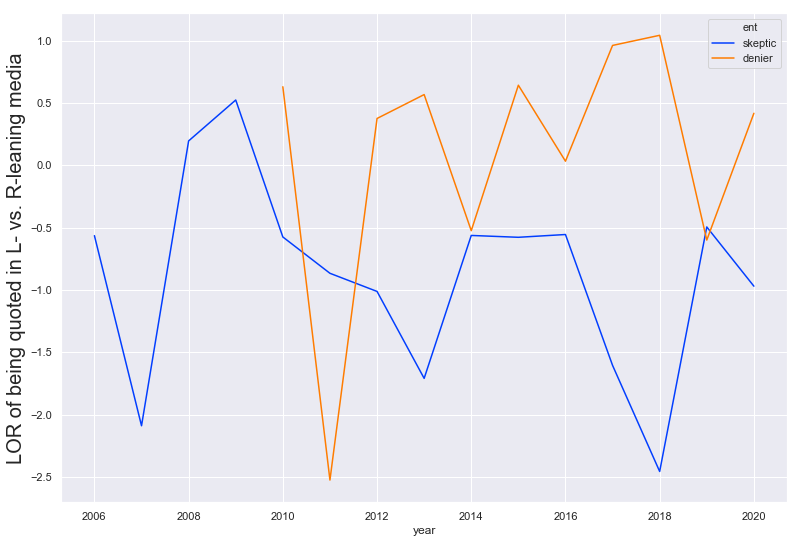

In [341]:
get_subj_ratios_df_over_time(SKEPTIC_ENTS)

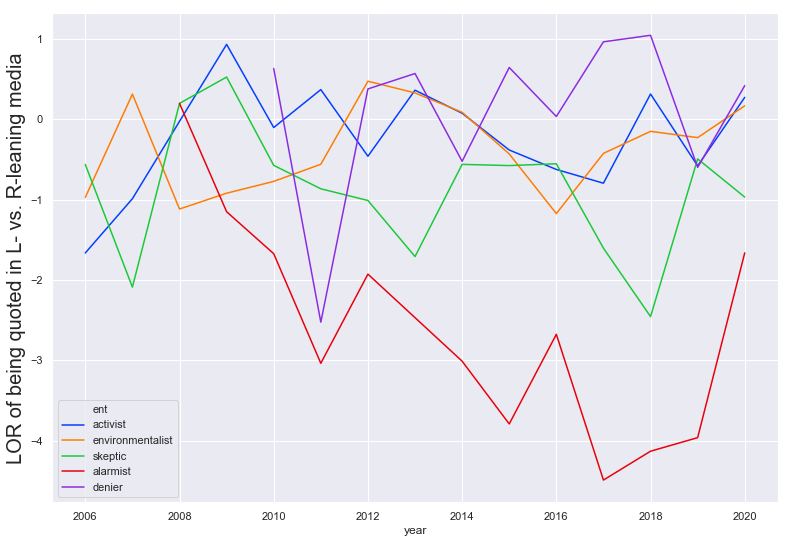

In [340]:
get_subj_ratios_df_over_time(['activist','alarmist','environmentalist','denier','skeptic'])

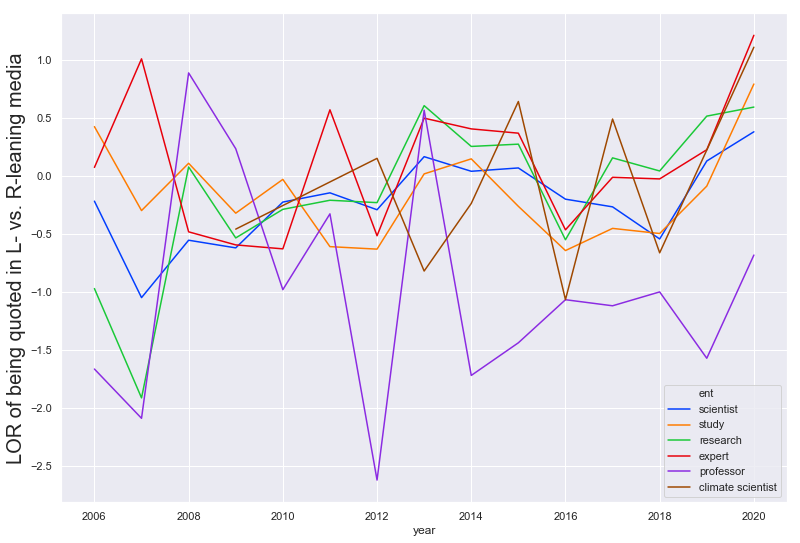

In [338]:
get_subj_ratios_df_over_time(['scientist','study','research','climate scientist','expert','professor'])

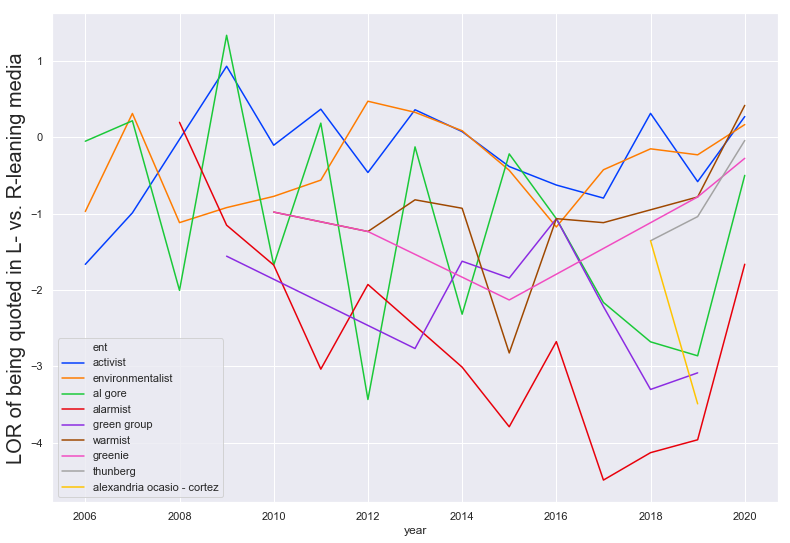

In [342]:
get_subj_ratios_df_over_time(SHORT_ACTIVIST_ENTS)

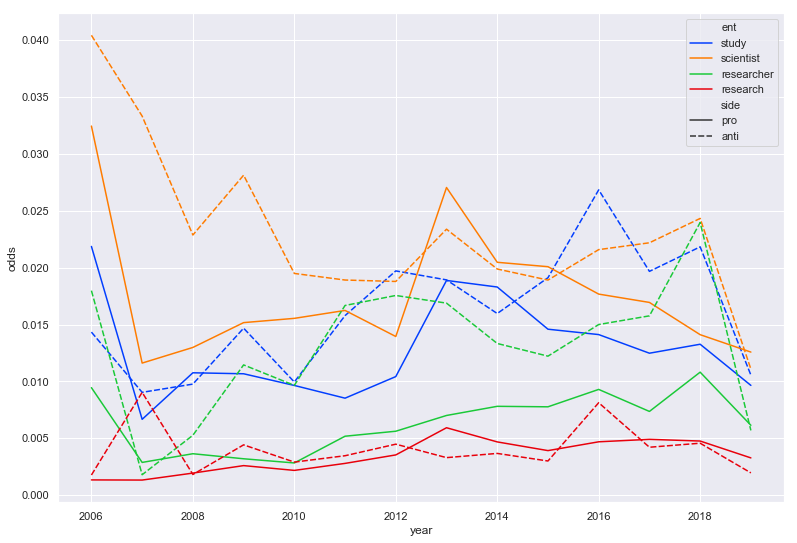

In [658]:
get_subj_df_over_time(['study','scientist','researcher','research'])

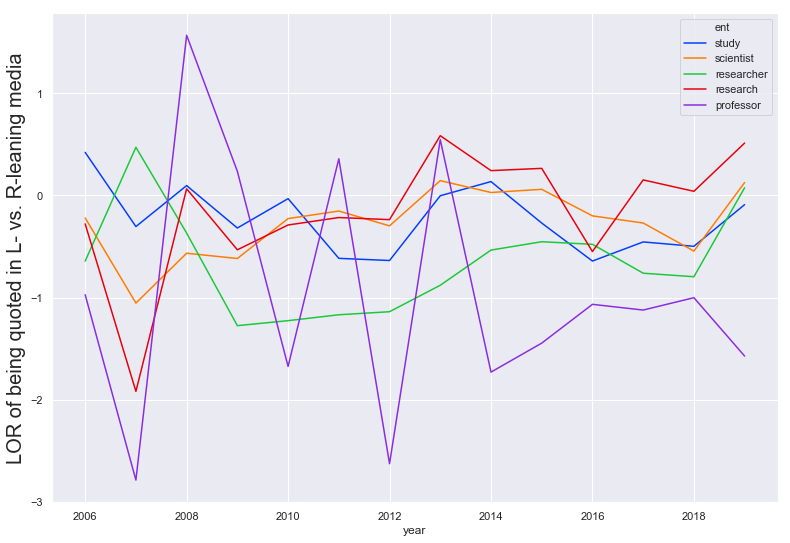

In [662]:
get_subj_ratios_df_over_time(['study','scientist','researcher','research','professor'])

In [289]:
skeptic_df = get_subj_df_over_time(SKEPTIC_ENTS)
scientist_df = get_subj_df_over_time(SCIENTIST_ENTS)
activist_df = get_subj_df_over_time(SHORT_ACTIVIST_ENTS)
science_df = get_subj_df_over_time(SCIENCE_ENTS+SCIENTIST_ENTS)

In [89]:
sci_ents_dict = {topic:{side: {ent: None for ent in ent_set} for side in SIDES} for topic in TOPICS}
for topic in TOPICS:
    for side in SIDES:
        for ent in ent_set:
            qs_from_ent = [q for q in good_quotes if q['stance'] == side and 
                          q['topic'] == topic and 
                           q['main subject lemma coref'] is not None and 
                           q['main subject lemma coref'].lower() == ent]
            print(topic,side,ent,len(qs_from_ent))
            sci_ents_dict[topic][side][ent] = len(qs_from_ent)

cc pro scientist 4121
cc pro researcher 1805
cc pro climate scientist 21
cc pro climatologist 55
cc pro expert 1729
cc pro physicist 22
cc pro economist 325
cc anti scientist 1798
cc anti researcher 1202
cc anti climate scientist 4
cc anti climatologist 20
cc anti expert 636
cc anti physicist 13
cc anti economist 92
vax pro scientist 143
vax pro researcher 169
vax pro climate scientist 0
vax pro climatologist 0
vax pro expert 257
vax pro physicist 0
vax pro economist 4
vax anti scientist 58
vax anti researcher 281
vax anti climate scientist 0
vax anti climatologist 0
vax anti expert 41
vax anti physicist 0
vax anti economist 1


In [92]:
ents_df,sides_df,counts_df,freqs_df,odds_df = [],[],[],[],[]
for side in sci_ents_dict['cc']:
    for ent in sci_ents_dict['cc'][side]:
        ents_df.append(ent)
        sides_df.append(side)
        counts_df.append(sci_ents_dict['cc'][side][ent])
        freq = sci_ents_dict['cc'][side][ent]/np.sum([sci_ents_dict['cc'][side][ent] 
                                                              for ent in sci_ents_dict['cc'][side]])
        freqs_df.append(freq)
        odds_df.append(freq/(1-freq))
ent_df = pd.DataFrame({'ent':ents_df,
             'side':sides_df,
             'count':counts_df,
             'freq':freqs_df,
             'odds':odds_df})

In [93]:
ent_df

,ent,side,count,freq,odds
0,scientist,pro,4121,0.510151,1.041446
1,researcher,pro,1805,0.223446,0.287741
2,climate scientist,pro,21,0.002600,0.002606
3,climatologist,pro,55,0.006809,0.006855
4,expert,pro,1729,0.214038,0.272326
5,physicist,pro,22,0.002723,0.002731
6,economist,pro,325,0.040233,0.041919
7,scientist,anti,1798,0.477556,0.914082
8,researcher,anti,1202,0.319256,0.468982
9,climate scientist,anti,4,0.001062,0.001064


# Case study: most common opinion attribution verbs for Trump and Obama

In [11]:
ent_set = ['obama','trump']

In [12]:
main_verbs_by_ent = {topic:{side: {ent: None for ent in ent_set} for side in SIDES} for topic in TOPICS}
for topic in TOPICS:
    for side in SIDES:
        for ent in ent_set:
            qs_from_ent = [q for q in good_quotes if q['stance'] == side and 
                          q['topic'] == topic and 
                           q['main subject lemma coref'] is not None and 
                           q['main subject lemma coref'].lower() == ent]
            print(topic,side,ent,len(qs_from_ent))
            main_verbs = [q['main verb lemma coref'].lower() for q in qs_from_ent]
            main_verbs_by_ent[topic][side][ent] = main_verbs

cc pro obama 725
cc pro trump 1600
cc anti obama 348
cc anti trump 555
vax pro obama 14
vax pro trump 71
vax anti obama 0
vax anti trump 0


In [13]:
pro_obama_verb_odds,anti_obama_verb_odds = do_log_odds(main_verbs_by_ent['cc']['pro']['obama'],
                                                     main_verbs_by_ent['cc']['anti']['obama'],ratios=False)
pro_trump_verb_odds,anti_trump_verb_odds = do_log_odds(main_verbs_by_ent['cc']['pro']['trump'],
                                                     main_verbs_by_ent['cc']['anti']['trump'],ratios=False)

In [82]:
pro_obama_verb_odds,pro_trump_verb_odds = do_log_odds(main_verbs_by_ent['cc']['pro']['obama'],
                                                     main_verbs_by_ent['cc']['pro']['trump'],ratios=False)
anti_obama_verb_odds,anti_trump_verb_odds = do_log_odds(main_verbs_by_ent['cc']['anti']['obama'],
                                                     main_verbs_by_ent['cc']['anti']['trump'],ratios=False)

In [89]:
verb_df,odds_df,log_odds_df,subject_df,side_df = [],[],[],[],[]
for v in VERBS_TO_PLOT:#sorted(pro_obama_verb_odds.items(),key=lambda x:x[1],reverse=True)[3:15]:
    verb_df.append(v)
    odds_df.append(pro_obama_verb_odds[v])
    log_odds_df.append(np.log(pro_obama_verb_odds[v]))
    subject_df.append('obama')
    side_df.append('pro')
verb_odds_df = pd.DataFrame({"verb":verb_df,
                            "odds":odds_df,
                             'log odds':log_odds_df,
                            "subject":subject_df,
                            "side":side_df})
verb_odds_df = verb_odds_df.sort_values(by='odds')
sorted_verbs = verb_odds_df.verb.values.copy()
verb_df,odds_df,log_odds_df,subject_df,side_df = [],[],[],[],[]
for v in sorted_verbs:#sorted(pro_trump_verb_odds.items(),key=lambda x:x[1],reverse=True)[3:15]:
    verb_df.append(v)
    odds_df.append(pro_trump_verb_odds[v])
    log_odds_df.append(np.log(pro_trump_verb_odds[v]))
    subject_df.append('trump')
    side_df.append('pro')
verb_odds_df = verb_odds_df.append(pd.DataFrame({"verb":verb_df,
                            "odds":odds_df,
                             'log odds':log_odds_df,
                            "subject":subject_df,
                            "side":side_df}),ignore_index=True)
verb_df,odds_df,log_odds_df,subject_df,side_df = [],[],[],[],[]
for v in sorted_verbs:#sorted(anti_obama_verb_odds.items(),key=lambda x:x[1],reverse=True)[3:15]:
    verb_df.append(v)
    odds_df.append(anti_obama_verb_odds[v])
    log_odds_df.append(np.log(anti_obama_verb_odds[v]))
    subject_df.append('obama')
    side_df.append('anti')
verb_odds_df = verb_odds_df.append(pd.DataFrame({"verb":verb_df,
                            "odds":odds_df,
                             'log odds':log_odds_df,
                            "subject":subject_df,
                            "side":side_df}),ignore_index=True)
verb_df,odds_df,log_odds_df,subject_df,side_df = [],[],[],[],[]
for v in sorted_verbs:#sorted(anti_trump_verb_odds.items(),key=lambda x:x[1],reverse=True)[3:15]:
    verb_df.append(v)
    odds_df.append(anti_trump_verb_odds[v])
    log_odds_df.append(np.log(anti_trump_verb_odds[v]))
    subject_df.append('trump')
    side_df.append('anti')
verb_odds_df = verb_odds_df.append(pd.DataFrame({"verb":verb_df,
                            "odds":odds_df,
                             'log odds':log_odds_df,
                            "subject":subject_df,
                            "side":side_df}),ignore_index=True)

In [92]:
verb_odds_df

,verb,odds,log odds,subject,side
0,point_out,0.001381,-6.584791,obama,pro
1,assert,0.001381,-6.584791,obama,pro
2,admit,0.001381,-6.584791,obama,pro
3,reject,0.001381,-6.584791,obama,pro
4,tweet,0.001381,-6.584791,obama,pro
...,...,...,...,...,...
59,acknowledge,0.003617,-5.622211,trump,anti
60,claim,0.016484,-4.105394,trump,anti
61,argue,0.005435,-5.214936,trump,anti
62,pledge,0.001805,-6.317165,trump,anti


In [86]:
pro_obama_verb_odds['assert']

0.0013812154696132596

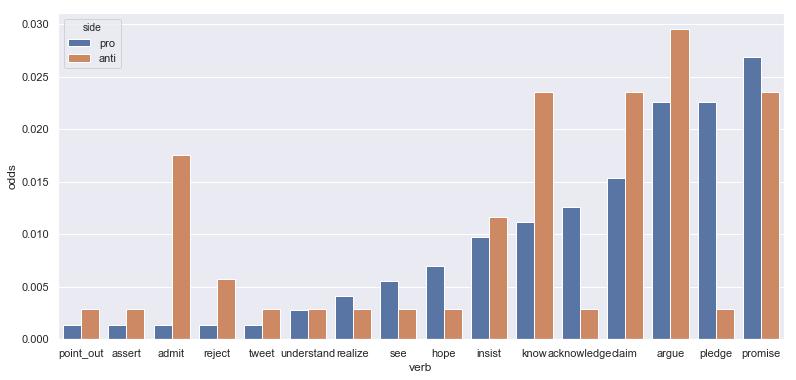

In [93]:
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x="verb", y="odds", data=verb_odds_df.loc[verb_odds_df.subject=='obama'], hue='side',ax=ax)

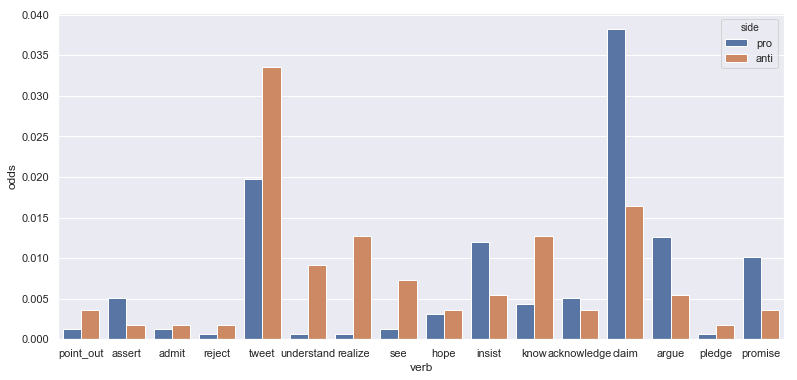

In [94]:
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x="verb", y="odds", data=verb_odds_df.loc[verb_odds_df.subject=='trump'], hue='side',ax=ax)

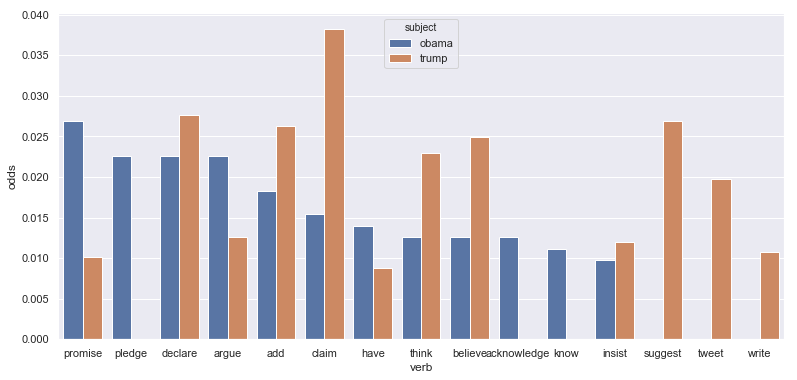

In [69]:
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x="verb", y="odds", data=verb_odds_df.loc[verb_odds_df.side=='pro'], hue='subject',ax=ax)
#ax.set_xticklabels(labels=verb_odds_df.verb.values,rotation=70,fontsize=20)

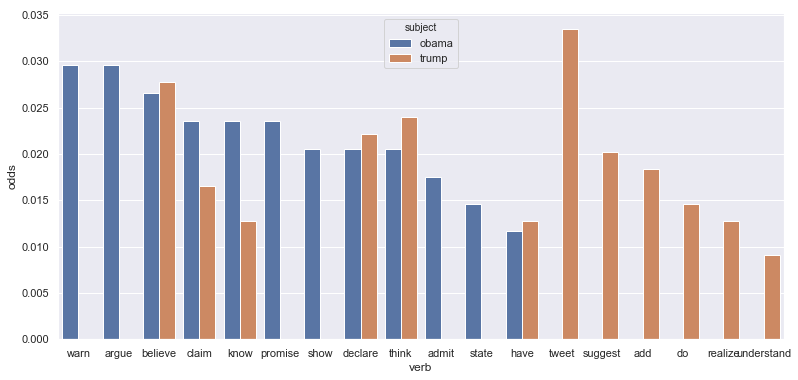

In [70]:
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x="verb", y="odds", data=verb_odds_df.loc[verb_odds_df.side=='anti'], hue='subject',ax=ax)
#ax.set_xticklabels(labels=verb_odds_df.verb.values,rotation=70,fontsize=20)

In [13]:
pro_anti_obama_verb_log_odds_ratios = do_log_odds(main_verbs_by_ent['cc']['pro']['obama'],
                                                     main_verbs_by_ent['cc']['anti']['obama'],ratios=True)
pro_anti_trump_verb_log_odds_ratios = do_log_odds(main_verbs_by_ent['cc']['pro']['trump'],
                                                     main_verbs_by_ent['cc']['anti']['trump'],ratios=True)

In [14]:
sorted_pro_anti_obama_verb_log_odds_ratios = sorted(pro_anti_obama_verb_log_odds_ratios.items(),
                                                    key=lambda x:x[1],reverse=True)
sorted_pro_anti_trump_verb_log_odds_ratios = sorted(pro_anti_trump_verb_log_odds_ratios.items(),
       key=lambda x:x[1],reverse=True)

In [15]:
verb_df,odds_ratios_df,subject_df,pref_df = [],[],[],[]
for v,o in sorted_pro_anti_obama_verb_log_odds_ratios[:10]+\
sorted_pro_anti_obama_verb_log_odds_ratios[-10:]:
    verb_df.append(v)
    odds_ratios_df.append(o)
    subject_df.append('obama')
    pref_df.append(o > 0)
verb_odds_df = pd.DataFrame({"verb":verb_df,
                            "log odds ratios":odds_ratios_df,
                            "subject":subject_df,
                            "pref":pref_df})

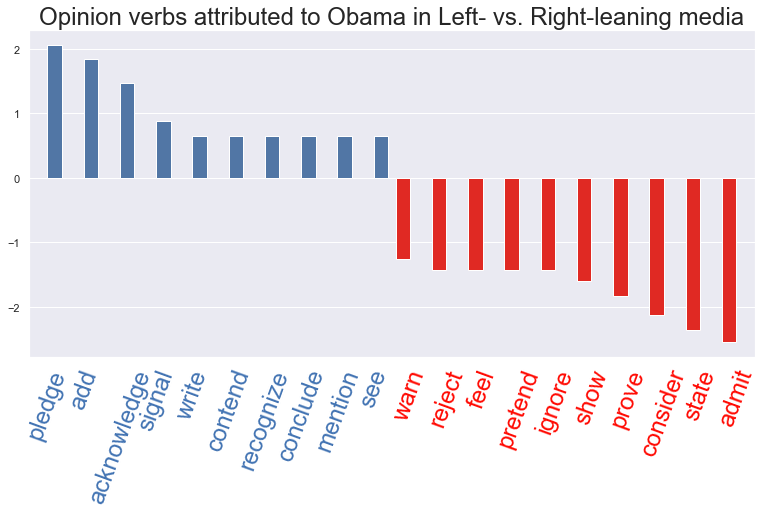

In [67]:
colors = ["#FF0B04","#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x="verb", y="log odds ratios", data=verb_odds_df, ax=ax, hue='pref')

ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=24,rotation=70)
ax.set_xlabel('')
ax.set_title('Opinion verbs attributed to Obama in Left- vs. Right-leaning media',fontsize=24)
ax.set_ylabel('')
ax.legend_.remove()


for tick in ax.get_xticklabels()[:10]: tick.set_color(colors[1])
for tick in ax.get_xticklabels()[10:]: tick.set_color(colors[0])

In [71]:
verb_df,odds_ratios_df,subject_df,pref_df = [],[],[],[]
for v,o in sorted_pro_anti_trump_verb_log_odds_ratios[:10]+\
sorted_pro_anti_trump_verb_log_odds_ratios[-10:]:
    verb_df.append(v)
    odds_ratios_df.append(o)
    subject_df.append('trump')
    pref_df.append(o > 0)
verb_odds_df = pd.DataFrame({"verb":verb_df,
                            "log odds ratios":odds_ratios_df,
                            "subject":subject_df,
                            "pref":pref_df})

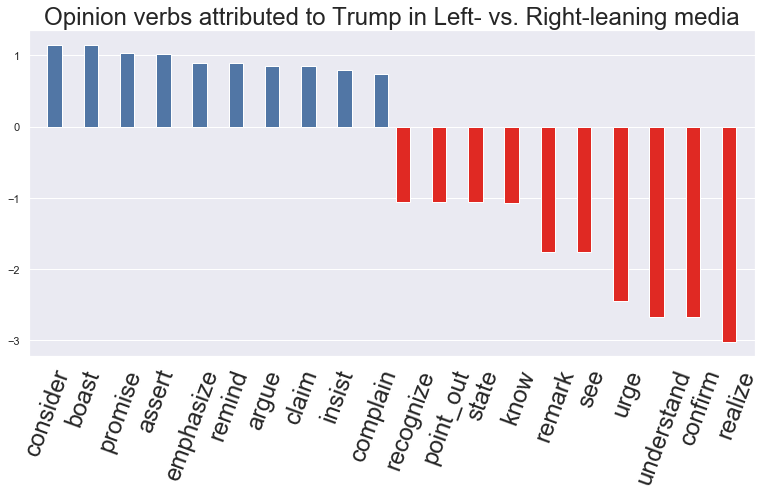

In [73]:
colors = ["#FF0B04","#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x="verb", y="log odds ratios", data=verb_odds_df, ax=ax, hue='pref')

ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=24,rotation=70)
ax.set_xlabel('')
ax.set_title('Opinion verbs attributed to Trump in Left- vs. Right-leaning media',fontsize=24)
ax.set_ylabel('')
ax.legend_.remove()

# Case study: Log odds of words in quotes from scientists in L vs. R-wing media

In [353]:
SCIENTIST_SOURCES = SCIENTIST_ENTS
SCIENTIST_SOURCES

['scientist',
 'researcher',
 'climate scientist',
 'climatologist',
 'expert',
 'physicist',
 'economist',
 'professor',
 'geophysicist',
 'chemist',
 'specialist',
 'panel']

In [498]:
scientist_quotes = defaultdict(dict)
for topic in TOPICS:
    for side in SIDES:
        scientist_quotes[topic][side] = [q for q in quotes_by_topic_side[topic][side] if q['main subject lemma coref'] is not None and \
                        (q['main subject lemma coref'].lower() in ['alarmist'] or \
                       q['main subject text'].lower() in ['alarmist'] or \
                        (q['main subject lemma coref'].lower() in ent_fuzzy_map and \
                         ent_fuzzy_map[q['main subject lemma coref'].lower()] in ['alarmist']))]
        print(topic,side,len(scientist_quotes[topic][side]))

cc pro 3
cc anti 123
vax pro 0
vax anti 0
covid pro 0
covid anti 1


In [499]:
anti_sci_quote_toks = [q['quote lemmas'] for q in anti_scientist_quotes]
pro_sci_quote_toks = [q['quote lemmas'] for q in pro_scientist_quotes]
anti_sci_quote_toks = [item.lower() for sublist in anti_sci_quote_toks for item in sublist]
pro_sci_quote_toks = [item.lower() for sublist in pro_sci_quote_toks for item in sublist]
len(pro_sci_quote_toks),len(anti_sci_quote_toks)

(164724, 81402)

In [30]:
log_odds_ratios_pro_anti_sci_quotes = do_log_odds(pro_sci_quote_toks,anti_sci_quote_toks)

In [31]:
sorted(log_odds_ratios_pro_anti_sci_quotes.items(),key=lambda x:x[1],reverse=True)[-100:]

[('450', -1.7566411849483894),
 ('swamp', -1.7566411849483894),
 ('error', -1.7566411849483894),
 ('plain', -1.7566411849483894),
 ('telescope', -1.7566411849483894),
 ('forecasting', -1.7566411849483894),
 ('exciting', -1.7566411849483894),
 ('door', -1.7566411849483894),
 ('quieter', -1.7566411849483894),
 ('#', -1.7566411849483894),
 ('caribbean', -1.7566411849483894),
 ('outer', -1.7566411849483894),
 ('crowd', -1.7566411849483894),
 ('cod', -1.7566411849483894),
 ('origin', -1.7566411849483894),
 ('compile', -1.7566411849483894),
 ('58', -1.7566411849483894),
 ('tectonic', -1.7566411849483894),
 ('mobile', -1.7566411849483894),
 ('sahara', -1.7566411849483894),
 ('installation', -1.7566411849483894),
 ('fukushima', -1.7566411849483894),
 ('productive', -1.7566411849483894),
 ('mitigation', -1.7566411849483894),
 ('book', -1.7566868936177982),
 ('thick', -1.7566868936177982),
 ('1998', -1.7566868936177982),
 ('operate', -1.7566868936177982),
 ('limited', -1.7566868936177982),
 ('th

# Case study: Log odds of op. attr. verbs for scientists in L vs. R-wing media

In [500]:
topic_side_sci_verb_toks = defaultdict(dict)
for topic in TOPICS:
    for side in SIDES:
        topic_side_sci_verb_toks[topic][side] = [q['main verb lemma'].lower() 
                                                 for q in scientist_quotes[topic][side]]

In [507]:
topic_sci_verb_log_odds_ratios_pro_anti = {}
for topic in ['cc']:
    topic_sci_verb_log_odds_ratios_pro_anti[topic] = do_log_odds(topic_side_sci_verb_toks[topic]['pro'],
                                                                 topic_side_sci_verb_toks[topic]['anti'])

In [508]:
topic_sci_verb_log_odds_ratios_pro_anti['cc']

{'acknowledge': 4.808111029984781,
 'suggest': 4.110873864173311,
 'say': 1.2809338454620642,
 'assert': 3.194583132299156,
 'claim': 0.2207878376217507,
 'concede': 3.194583132299156,
 'warn': 0.9295359586241757,
 'find': 1.7833912195575383,
 'think': 3.194583132299156,
 'admit': 1.3609765531356006,
 'charge': 3.194583132299156,
 'lament': 3.194583132299156,
 'know': 1.7833912195575383,
 'believe': 3.194583132299156,
 'correct': 3.194583132299156,
 'prove': 2.4932054526026954,
 'predict': 0.9295359586241757,
 'insist': 0.526093095896779,
 'pretend': 2.4932054526026954,
 'explain': 1.5518087995974639,
 'proclaim': 3.194583132299156,
 'unaware': 3.194583132299156,
 'delude': 3.194583132299156,
 'disappoint': 3.194583132299156,
 'comfort': 2.4932054526026954,
 'write': 3.194583132299156,
 'conclude': 3.194583132299156,
 'wish': 3.194583132299156,
 'persuade': 3.194583132299156,
 'speculate': 3.194583132299156,
 'argue': 2.4932054526026954,
 'assume': 3.194583132299156,
 'rush': 3.1945831

In [505]:
topic_side_sci_verb_toks['cc']['pro']

['acknowledge', 'suggest', 'say']

In [510]:
topic_sci_verb_sorted_lor_pro_anti = {}
for topic in ['cc']:
     topic_sci_verb_sorted_lor_pro_anti[topic] = sorted(topic_sci_verb_log_odds_ratios_pro_anti[topic].items(),
                                                        key=lambda x:x[1],reverse=True)

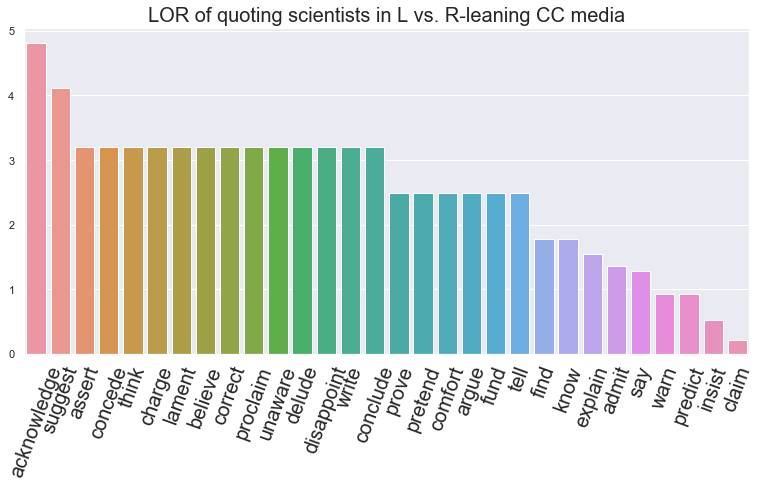

In [511]:
for topic in ['cc']:
    verb_df,lor_df = [],[]
    for item in topic_sci_verb_sorted_lor_pro_anti[topic][:15]+\
    topic_sci_verb_sorted_lor_pro_anti[topic][-15:]:
        v = item[0]
        lor = item[1]
        verb_df.append(v)
        lor_df.append(lor)
    subj_verb_df =pd.DataFrame({"verb":verb_df,
                               "log_odds_ratio":lor_df})
    fig,ax=plt.subplots(figsize=(13,6))
    sns.barplot(x='verb',y='log_odds_ratio',data=subj_verb_df,ax=ax)
    ax.set_xticklabels(subj_verb_df.verb.values,rotation=70,fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title("LOR of quoting scientists in L vs. R-leaning {} media".format(topic.upper()),fontsize=20)

Stratified by the type of scientist entity:

In [493]:
def get_verbs_for_subj(subj_set,topic_set=TOPICS,get_df=False):
    subj_quotes = defaultdict(dict)
    for topic in topic_set:
        for side in SIDES:
            subj_quotes[topic][side] = [q for q in quotes_by_topic_side[topic][side] if q['main subject lemma coref'] is not None and \
                            (q['main subject lemma coref'].lower() in subj_set or \
                           q['main subject text'].lower() in subj_set or \
                            (q['main subject lemma coref'].lower() in ent_fuzzy_map and \
                             ent_fuzzy_map[q['main subject lemma coref'].lower()] in subj_set))]
            print(topic,side,len(subj_quotes[topic][side]))
            
    topic_side_subj_verb_toks = defaultdict(dict)
    for topic in topic_set:
        for side in SIDES:
            topic_side_subj_verb_toks[topic][side] = [q['main verb lemma'].lower() 
                                                     for q in subj_quotes[topic][side]]
            
    topic_subj_verb_log_odds_ratios_pro_anti = {}
    for topic in topic_set:
        topic_subj_verb_log_odds_ratios_pro_anti[topic] = do_log_odds(topic_side_subj_verb_toks[topic]['pro'],
                                                                     topic_side_subj_verb_toks[topic]['anti'])
        
    topic_subj_verb_sorted_lor_pro_anti = {}
    for topic in topic_set:
         topic_subj_verb_sorted_lor_pro_anti[topic] = sorted(topic_subj_verb_log_odds_ratios_pro_anti[topic].items(),
                                                            key=lambda x:x[1],reverse=True)

    subj_verb_dfs = {}
    for topic in topic_set:
        verb_df,lor_df = [],[]
        for item in topic_subj_verb_sorted_lor_pro_anti[topic][:15]+\
        topic_subj_verb_sorted_lor_pro_anti[topic][-15:]:
            v = item[0]
            lor = item[1]
            verb_df.append(v)
            lor_df.append(lor)
        subj_verb_df = pd.DataFrame({"verb":verb_df,
                                   "log_odds_ratio":lor_df})
        subj_verb_dfs[topic] = subj_verb_df
        fig,ax=plt.subplots(figsize=(13,6))
        sns.barplot(x='verb',y='log_odds_ratio',data=subj_verb_df,ax=ax)
        ax.set_xticklabels(subj_verb_df.verb.values,rotation=70,fontsize=20)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title("LOR of quoting '{}' in L vs. R-leaning {} media".format(', '.join(subj_set),topic.upper()),
                     fontsize=20)
        
    if get_df:
        return subj_verb_dfs

cc pro 7178
cc anti 3336
vax pro 585
vax anti 627
covid pro 1369
covid anti 1509


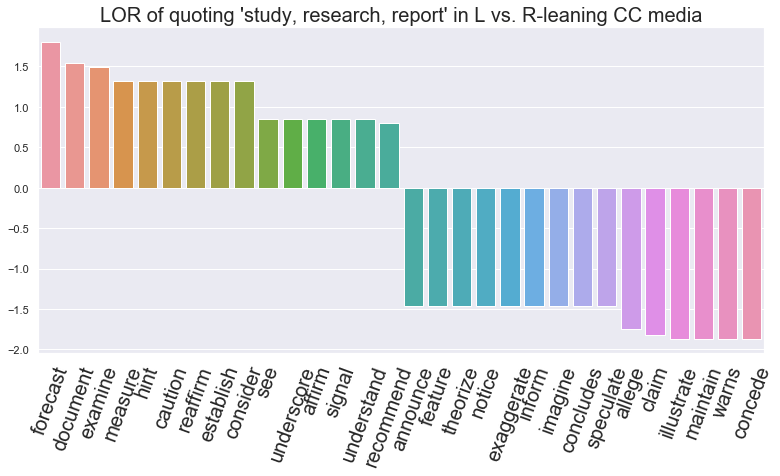

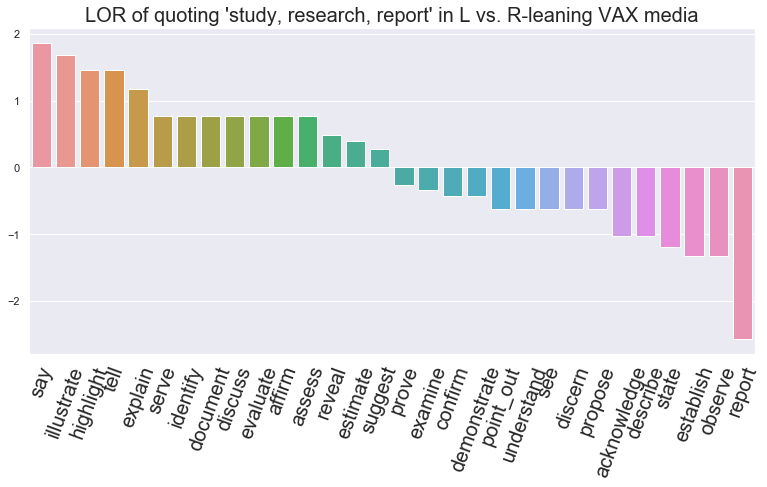

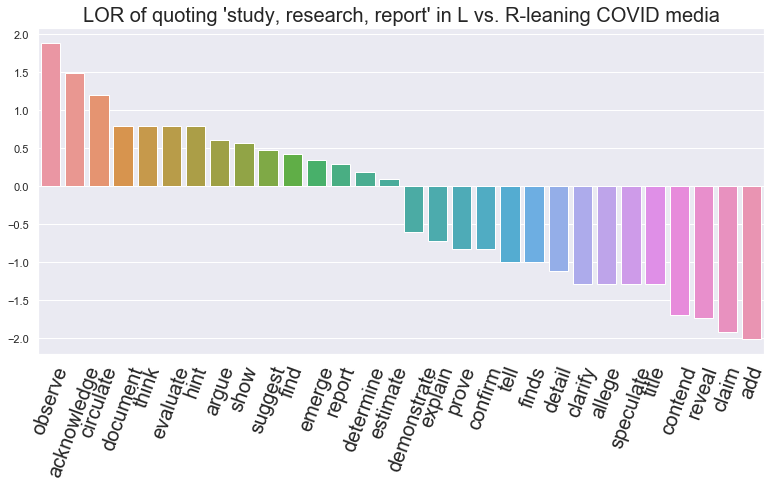

In [487]:
get_verbs_for_subj(['study','research','report'])

cc pro 1941
cc anti 751
vax pro 301
vax anti 51
covid pro 2523
covid anti 1654


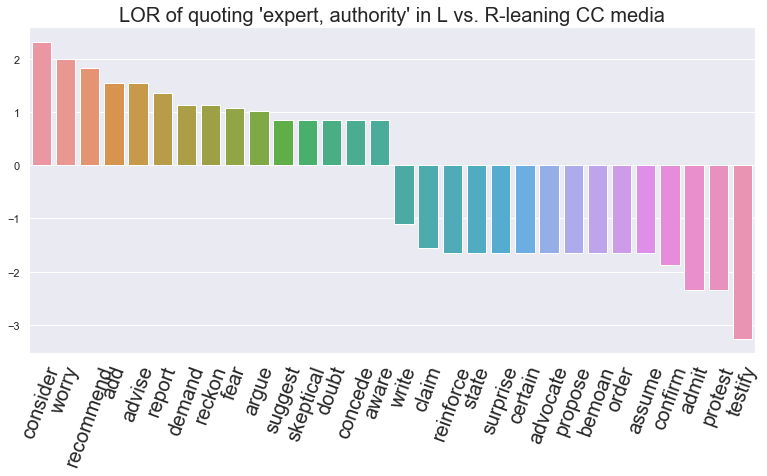

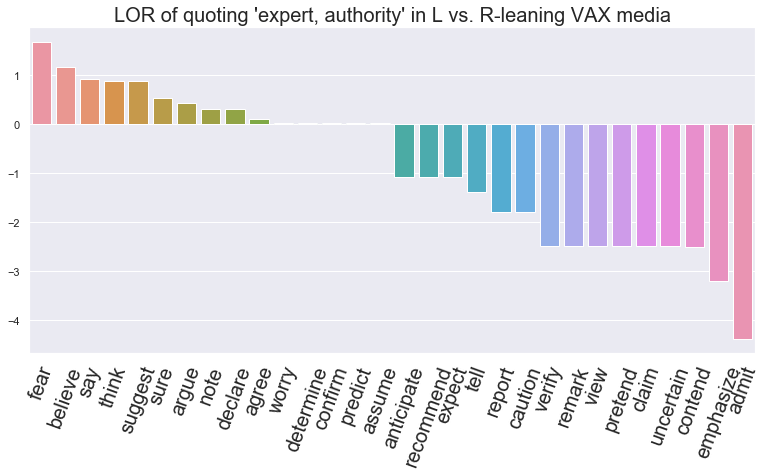

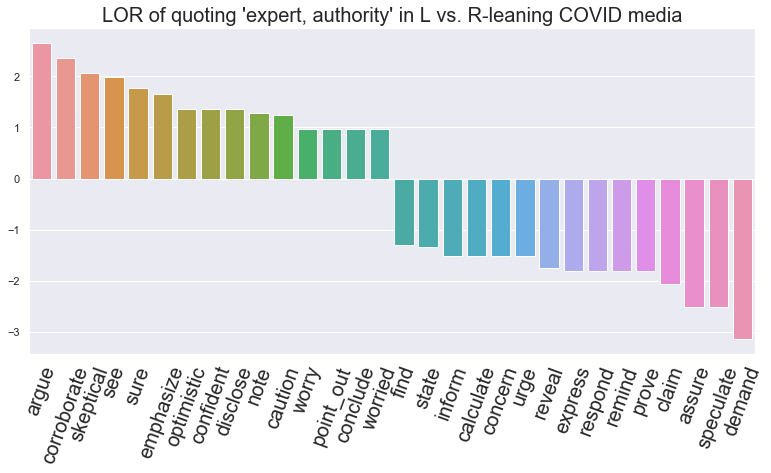

In [569]:
get_verbs_for_subj(['expert','authority'])

cc pro 325
cc anti 92
covid pro 174
covid anti 59


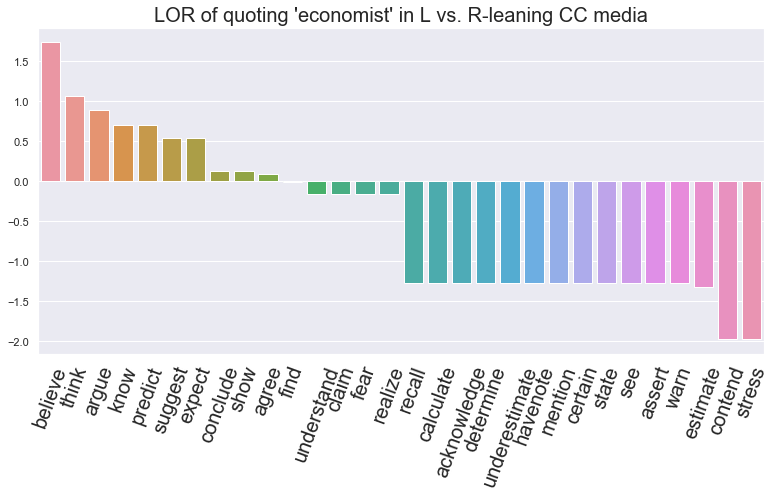

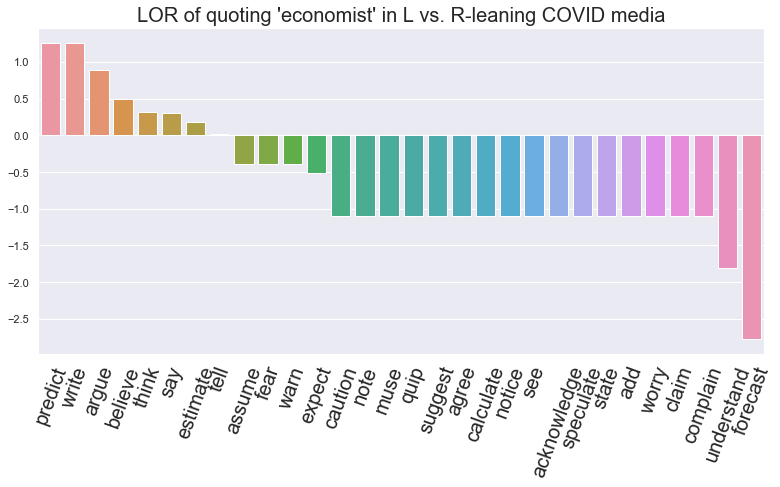

In [488]:
get_verbs_for_subj(['economist'],topic_set=['cc','covid'])

cc pro 5926
cc anti 3000
vax pro 312
vax anti 339
covid pro 1012
covid anti 1019


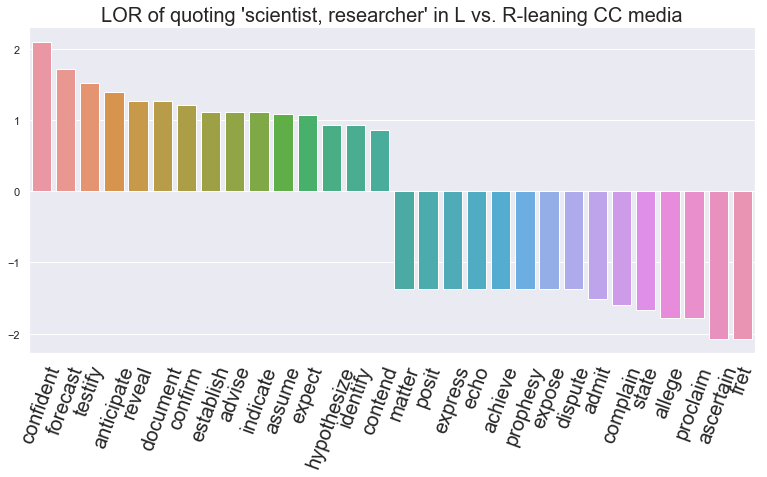

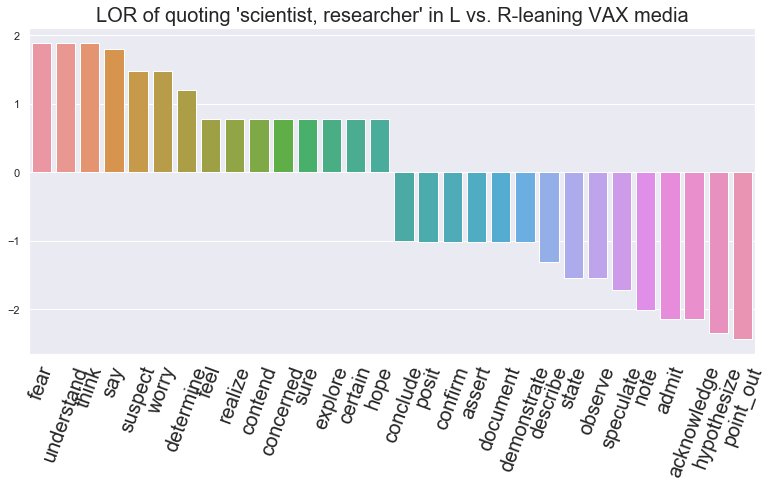

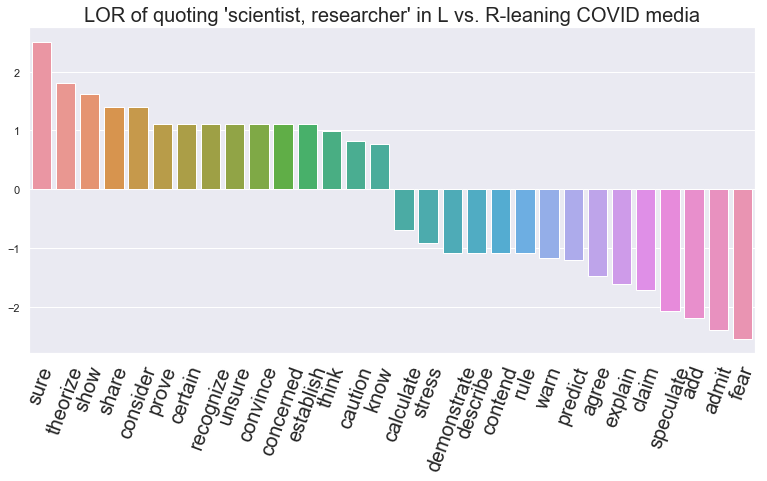

In [489]:
get_verbs_for_subj(['scientist','researcher'])

cc pro 76
cc anti 24


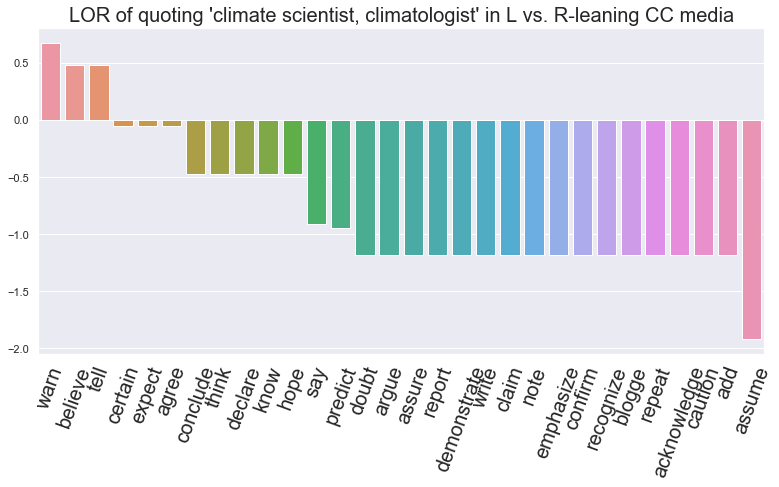

In [490]:
get_verbs_for_subj(['climate scientist','climatologist'],topic_set=['cc'])

## Is odds of verb being attributed to scientist inversely correlated with odds of being attributed to economist?

In [609]:
scientist_quotes = defaultdict(dict)
for topic in TOPICS:
    for side in SIDES:
        scientist_quotes[topic][side] = [q for q in quotes_by_topic_side[topic][side] if q['main subject lemma coref'] is not None and \
                        (q['main subject lemma coref'].lower() in ['obama'] or \
                       q['main subject text'].lower() in ['obama'] or \
                        (q['main subject lemma coref'].lower() in ent_fuzzy_map and \
                         ent_fuzzy_map[q['main subject lemma coref'].lower()] in ['obama']))]
        print(topic,side,len(scientist_quotes[topic][side]))

cc pro 938
cc anti 554
vax pro 17
vax anti 0
covid pro 30
covid anti 17


In [610]:
econ_quotes = defaultdict(dict)
for topic in TOPICS:
    for side in SIDES:
        econ_quotes[topic][side] = [q for q in quotes_by_topic_side[topic][side] if q['main subject lemma coref'] is not None and \
                        (q['main subject lemma coref'].lower() in ['trump'] or \
                       q['main subject text'].lower() in ['trump'] or \
                        (q['main subject lemma coref'].lower() in ent_fuzzy_map and \
                         ent_fuzzy_map[q['main subject lemma coref'].lower()] in ['trump']))]
        print(topic,side,len(econ_quotes[topic][side]))

cc pro 2536
cc anti 1116
vax pro 124
vax anti 1
covid pro 3619
covid anti 2225


In [611]:
topic_side_sci_verb_toks = defaultdict(dict)
for topic in TOPICS:
    for side in SIDES:
        topic_side_sci_verb_toks[topic][side] = [q['main verb lemma'].lower() 
                                                 for q in scientist_quotes[topic][side]]
        
topic_side_econ_verb_toks = defaultdict(dict)
for topic in TOPICS:
    for side in SIDES:
        topic_side_econ_verb_toks[topic][side] = [q['main verb lemma'].lower() 
                                                 for q in econ_quotes[topic][side]]

In [612]:
topic_sci_verb_log_odds_ratios_pro_anti = {}
for topic in ['cc','covid']:
    topic_sci_verb_log_odds_ratios_pro_anti[topic] = do_log_odds(topic_side_sci_verb_toks[topic]['pro'],
                                                                 topic_side_sci_verb_toks[topic]['anti'])
    
topic_econ_verb_log_odds_ratios_pro_anti = {}
for topic in ['cc','covid']:
    topic_econ_verb_log_odds_ratios_pro_anti[topic] = do_log_odds(topic_side_econ_verb_toks[topic]['pro'],
                                                                 topic_side_econ_verb_toks[topic]['anti'])

In [601]:
VERB_SET = ['assure','reassure','claim','warn','forecast','worry','fear']

In [614]:
ratio_df,verb_df,subj_df = [],[],[]
for v in topic_sci_verb_log_odds_ratios_pro_anti['cc']:
    if v in topic_econ_verb_log_odds_ratios_pro_anti['cc']:
        verb_df.extend([v]*2)
        subj_df.append('sci')
        ratio_df.append(topic_sci_verb_log_odds_ratios_pro_anti['cc'][v])
        subj_df.append('econ')
        ratio_df.append(topic_econ_verb_log_odds_ratios_pro_anti['cc'][v])

In [615]:
sci_econ_df = pd.DataFrame({'L_R_ratio':ratio_df,
             'verb':verb_df,
             'subj':subj_df})

In [599]:
#sci_econ_df = sci_econ_df.sort_values(by='subj')

In [616]:
import scipy.stats as stats
# covid
stats.spearmanr(sci_econ_df.loc[sci_econ_df.subj=='sci'].L_R_ratio.values,
               sci_econ_df.loc[sci_econ_df.subj=='econ'].L_R_ratio.values)

SpearmanrResult(correlation=0.1060226161889587, pvalue=0.2573284645118338)

In [608]:
# cc
stats.spearmanr(sci_econ_df.loc[sci_econ_df.subj=='sci'].L_R_ratio.values,
               sci_econ_df.loc[sci_econ_df.subj=='econ'].L_R_ratio.values)

SpearmanrResult(correlation=-0.10540925533894598, pvalue=0.894590744661054)

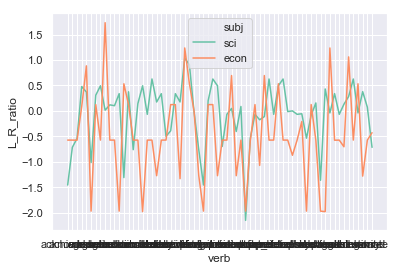

In [592]:
sns.lineplot(x='verb',y='L_R_ratio',data=sci_econ_df,hue='subj')

# Scientist quotes themselves

In [42]:
pd.set_option('max_colwidth', 400)

In [38]:
anti_sci_quotes = [q['quote text'] for q in anti_scientist_quotes]
pro_sci_quotes = [q['quote text'] for q in pro_scientist_quotes]

In [40]:
anti_sci_quote_strs = [' '.join(x) for x in anti_sci_quotes]
pro_sci_quote_strs = [' '.join(x) for x in anti_sci_quotes]

In [43]:
pd.DataFrame(anti_sci_quote_strs[:100])

,0
0,"the system is an indispensable tool for measuring local temperatures , and that its readings are buttressed by the consensus drawn from the 8,000 surface stations that make up the Cooperative Observer Program , the overall national system of which the 1,218 stations in the Historical Climatology Network are just a part"
1,whether the adjustments were appropriate
2,"Bremer Canyon , for example , is home to the Southern Hemisphere 's largest seasonal gathering of killer whales and often hosts traveling sharks , dolphins , squids and birds"
3,which did its best to deny that the Pause was a thing
4,it was wrong than actually looking at the data
...,...
95,"it is currently warming , albeit very slowly , but that the warming is n’t being caused by humans"
96,They found that the age of the trash introduced an intriguing new timeline for the Byzantine decline
97,"that trash disposal — once a well - organized and reliable service in outpost cities like Elusa — ceased around the middle of the sixth century , about 100 years prior to the empire 's collapse"
98,"This suggested there was a failure of infrastructure , which happens when a city is about to collapse"


# How each side describes different source entities

In [669]:
POS_ADJS = set(['novel','new','landmark','ground-breaking','prominent','expert','leading','foremost','eminent',
               'peer-reviewed','distinguished'])
NEG_ADJS = set(['debunked','flawed','skeptic','skeptical','dishonest','outspoken','preliminary'])

GENERIC_ADJS = set(['many','numerous','multiple'])

In [560]:
Counter(covid_neg_subj_adjs)

Counter({'skeptic': 61,
         'Skeptic': 2,
         'skeptical': 36,
         'Skeptical': 15,
         'debunked': 6,
         'flawed': 7,
         'Dishonest': 1})

## Scientists as sources

For this, we look at the broader lemmas that are part of the subtree of instances of "scientist", "researcher", etc.

In [561]:
def get_adjs_for_subj(subj_set,adj_set,topic_set=TOPICS,get_df=False):
    subj_quotes = defaultdict(dict)
    for topic in topic_set:
        for side in SIDES:
            subj_quotes[topic][side] = [q for q in quotes_by_topic_side[topic][side] if q['main subject lemma coref'] is not None and \
                            (q['main subject lemma coref'].lower() in subj_set or \
                           q['main subject text'].lower() in subj_set or \
                            (q['main subject lemma coref'].lower() in ent_fuzzy_map and \
                             ent_fuzzy_map[q['main subject lemma coref'].lower()] in subj_set))]
            
    topic_side_subj_adj_toks = defaultdict(dict)
    for topic in topic_set:
        for side in SIDES:
            adjs = [[a for a in q['subject text'] if a.lower() in adj_set]
                                                     for q in subj_quotes[topic][side]]
            topic_side_subj_adj_toks[topic][side] = [item.lower() for sublist in adjs for item in sublist]
            print(topic,side,len(topic_side_subj_adj_toks[topic][side]))
            
    topic_subj_adj_log_odds_ratios_pro_anti = {}
    for topic in topic_set:
        topic_subj_adj_log_odds_ratios_pro_anti[topic] = do_log_odds(topic_side_subj_adj_toks[topic]['pro'],
                                                                     topic_side_subj_adj_toks[topic]['anti'])
        
    topic_subj_adj_sorted_lor_pro_anti = {}
    for topic in topic_set:
         topic_subj_adj_sorted_lor_pro_anti[topic] = sorted(topic_subj_adj_log_odds_ratios_pro_anti[topic].items(),
                                                            key=lambda x:x[1],reverse=True)

    subj_adj_dfs = {}
    for topic in topic_set:
        adj_df,lor_df = [],[]
        for item in topic_subj_adj_sorted_lor_pro_anti[topic][:15]+\
        topic_subj_adj_sorted_lor_pro_anti[topic][-15:]:
            a = item[0]
            lor = item[1]
            adj_df.append(a)
            lor_df.append(lor)
        subj_adj_df = pd.DataFrame({"adj":adj_df,
                                   "log_odds_ratio":lor_df})
        subj_adj_dfs[topic] = subj_adj_df
        fig,ax=plt.subplots(figsize=(13,6))
        sns.barplot(x='adj',y='log_odds_ratio',data=subj_adj_df,ax=ax)
        ax.set_xticklabels(subj_adj_df.adj.values,rotation=70,fontsize=20)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title("LOR of describing '{}' in L vs. R-leaning {} media".format(', '.join(subj_set),topic.upper()),
                     fontsize=20)
        
    if get_df:
        return subj_adj_dfs

cc pro 56
cc anti 20
vax pro 12
vax anti 23
covid pro 9
covid anti 3


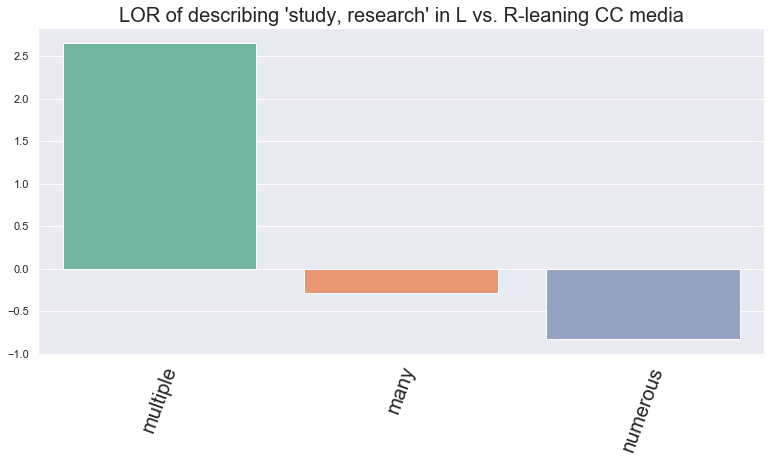

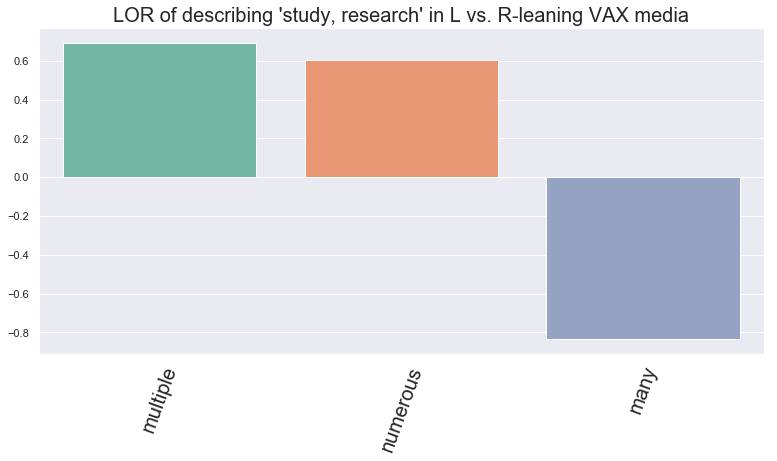

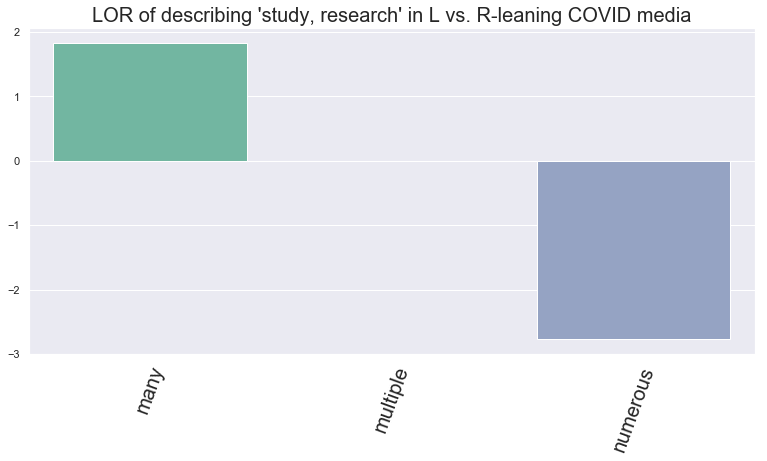

In [562]:
get_adjs_for_subj(['study','research'],GENERIC_ADJS,topic_set=TOPICS)

cc pro 532
cc anti 308
vax pro 49
vax anti 23
covid pro 82
covid anti 60


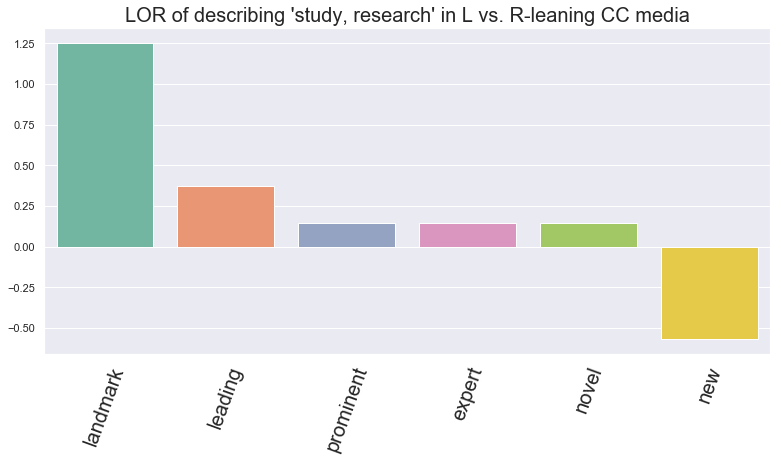

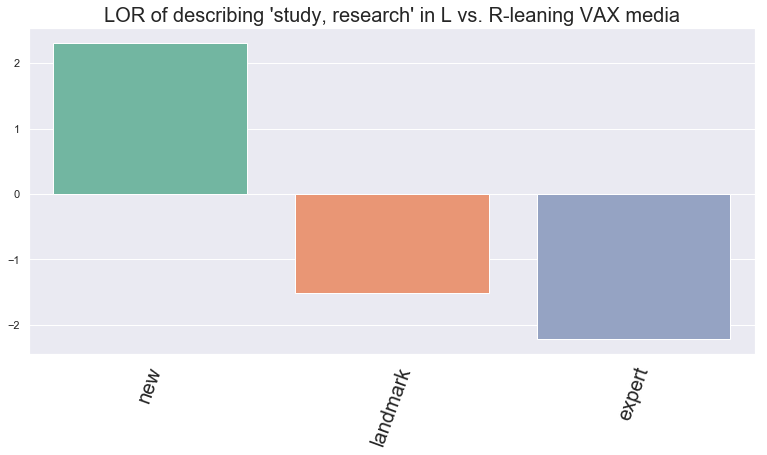

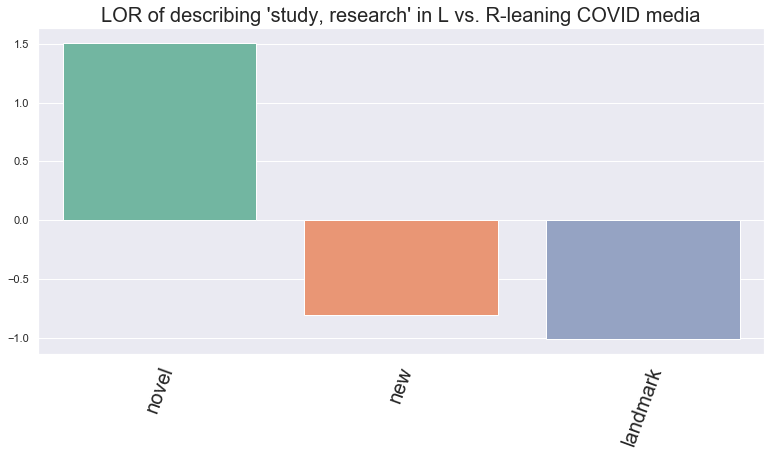

In [563]:
get_adjs_for_subj(['study','research'],POS_ADJS,topic_set=TOPICS)

In [680]:
get_adjs_for_subj(['study','research','data'],NEG_ADJS,topic_set=TOPICS)

cc pro 1
cc anti 0
vax pro 1
vax anti 0
covid pro 0
covid anti 0


ZeroDivisionError: float division by zero

In [67]:
contains_el(good_quotes[0]['subject lemmas'],SCIENTIST_SOURCES)

False

In [68]:
good_quotes[0]['subject lemmas']

['the', 'pro', '-', 'Trump', 'LaRouche', 'PAC', ',', 'which', 'believe', ',']

In [72]:
for topic in ['cc','vax']:
    for side in ['anti','pro']:
        qs_from_scientists = [q for q in good_quotes if q['topic'] == topic and q['stance'] == side and 
                             contains_el(q['subject lemmas'],SCIENTIST_SOURCES)]
        quotes_from_scientists_dict[topic][side] = qs_from_scientists

In [73]:
print(len(quotes_from_scientists_dict['cc']['pro']))
print(len(quotes_from_scientists_dict['cc']['anti']))

print(len(quotes_from_scientists_dict['vax']['pro']))
print(len(quotes_from_scientists_dict['vax']['anti']))

8447
4027
373
387


In [80]:
scientist_subject_lemmas_dict = defaultdict(dict)
for topic in TOPICS:
    for side in SIDES:
        subj_lemmas_scientists = [q['subject lemmas'] for q in quotes_from_scientists_dict[topic][side]]
        subj_lemmas_scientists = [item.lower() for sublist in subj_lemmas_scientists for item in sublist]
        scientist_subject_lemmas_dict[topic][side] = subj_lemmas_scientists

In [111]:
sorted(Counter(scientist_subject_lemmas_dict['cc']['pro']).items(),key=lambda x:x[1],reverse=True)

[('scientist', 5909),
 ('the', 3938),
 (',', 3459),
 ('researcher', 2576),
 ('a', 1957),
 ('of', 1808),
 ('at', 1467),
 ('and', 1282),
 ('climate', 1164),
 ('university', 901),
 ('who', 764),
 ('in', 717),
 ('study', 426),
 ('research', 390),
 ('-', 363),
 ('for', 357),
 ('’s', 352),
 ('some', 320),
 ('an', 301),
 ('lead', 281),
 ('with', 271),
 ('by', 260),
 ('be', 251),
 ('on', 242),
 ('author', 238),
 ('institute', 230),
 ('many', 227),
 ('senior', 224),
 ('national', 223),
 ('from', 222),
 ('atmospheric', 208),
 ('center', 197),
 ('nasa', 194),
 ('-pron-', 178),
 ('one', 170),
 ('environmental', 168),
 ('other', 159),
 ('to', 142),
 ('state', 141),
 ('change', 139),
 ('group', 136),
 ('report', 136),
 ('political', 133),
 ('california', 132),
 ('most', 130),
 ('new', 128),
 ('have', 121),
 ('work', 119),
 ('team', 110),
 ('"', 110),
 ('that', 108),
 ('science', 104),
 ('james', 101),
 ('michael', 99),
 ('dr.', 99),
 ('chief', 98),
 ('not', 97),
 ('international', 90),
 ('hansen', 8

In [112]:
sorted(Counter(scientist_subject_lemmas_dict['cc']['anti']).items(),key=lambda x:x[1],reverse=True)

[('scientist', 2574),
 ('the', 1835),
 ('researcher', 1478),
 (',', 1314),
 ('of', 767),
 ('a', 703),
 ('at', 546),
 ('and', 511),
 ('climate', 491),
 ('university', 395),
 ('in', 366),
 ('who', 285),
 ('-', 191),
 ('study', 190),
 ('research', 177),
 ('for', 147),
 ('with', 141),
 ("'s", 128),
 ('some', 127),
 ('lead', 118),
 ('nasa', 118),
 ('institute', 116),
 ('an', 110),
 ('national', 108),
 ('"', 106),
 ('on', 106),
 ('atmospheric', 105),
 ('author', 100),
 ('from', 98),
 ('be', 98),
 ('center', 96),
 ('many', 89),
 ('’s', 89),
 ('by', 85),
 ('-pron-', 79),
 ('senior', 75),
 ('one', 71),
 ('new', 69),
 ('earth', 63),
 ('group', 62),
 ('state', 61),
 ('to', 61),
 ('laboratory', 60),
 ('other', 59),
 ('most', 59),
 ('change', 58),
 ('team', 56),
 ('that', 56),
 ('environmental', 54),
 ('michael', 54),
 ('chief', 54),
 ('report', 54),
 ('science', 51),
 ('co', 50),
 ('dr.', 49),
 ('(', 49),
 (')', 48),
 ('global', 46),
 ('california', 45),
 ('have', 43),
 ('space', 43),
 ('percent',

In [83]:
log_odds_ratios_pro_anti_cc_sci_subj_lemmas = do_log_odds(scientist_subject_lemmas_dict['cc']['pro'],
                                                         scientist_subject_lemmas_dict['cc']['anti'])

In [84]:
sorted(log_odds_ratios_pro_anti_cc_sci_subj_lemmas.items(),key=lambda x:x[1],reverse=True)

[('both', 2.256274006239917),
 ('e.', 2.161257205207995),
 ('netherlands', 2.1096144693325356),
 ('advocate', 2.1096144693325356),
 ('a.', 1.9379641100023743),
 ('carolina', 1.9377081528332225),
 ('chairman', 1.8731509458697841),
 ('b.', 1.8731509458697841),
 ('pieter', 1.8731509458697841),
 ('health', 1.8045765853418452),
 ('social', 1.804357953817576),
 ('china', 1.804139388906119),
 ('d.', 1.804139388906119),
 ('j.', 1.7679716196299735),
 ('britain', 1.7302126019797082),
 ('economic', 1.7300127316248237),
 ('george', 1.6909731995083064),
 ('h.', 1.6499513391728415),
 ('methane', 1.6499513391728415),
 ('rob', 1.5629212777538803),
 ('post', 1.5629212777538803),
 ('williams', 1.5629212777538803),
 ('mr.', 1.5629212777538803),
 ('alan', 1.5629212777538803),
 ('working', 1.5629212777538803),
 ('lee', 1.5629212777538803),
 ('peters', 1.5165450585837559),
 ('glen', 1.4677362068424928),
 ('r.', 1.4677362068424928),
 ('north', 1.4677362068424928),
 ('overwhelming', 1.4677362068424928),
 ('pr

In [85]:
sorted(log_odds_ratios_pro_anti_cc_sci_subj_lemmas.items(),key=lambda x:x[1],reverse=False)

[('cato', -3.4011686419006932),
 ('knappenberger', -3.3205412708967676),
 ('chip', -3.3205412708967676),
 ('man', -2.9149038455521454),
 ('pat', -2.9149038455521454),
 ('may', -2.781329378257676),
 ('very', -2.627135625615818),
 ('cold', -2.627135625615818),
 ('army', -2.444770997862451),
 ('visit', -2.444770997862451),
 ('insist', -2.444770997862451),
 ('engineers', -2.444770997862451),
 ('michaels', -2.2827129984914873),
 ('greenbelt', -2.2217379840532954),
 ('libertarian', -2.2217379840532954),
 ('climatologist', -2.2215843774438566),
 ('marshall', -2.2215843774438566),
 ('famous', -2.2215843774438566),
 ('turner', -2.2215843774438566),
 ('adams', -2.2215843774438566),
 ('gaia', -2.2215843774438566),
 ('geophysics', -2.2215843774438566),
 ('nongovernmental', -2.2215843774438566),
 ('perovich', -2.2215843774438566),
 ('nancy', -2.2215843774438566),
 ('16', -2.2215843774438566),
 ('ohio', -2.1348371609193),
 ('palisades', -2.0881635167588257),
 ('csiro', -1.9339697641169677),
 ('danis

In [ ]:
# famous, skeptical, outspoken, distinguished

# How each side describes scientists (in quotes)

# When a scientist is described as an "expert", or the source entity is simply "expert", is the quote stance different?

# How often does media quote from scientists vs. studies?

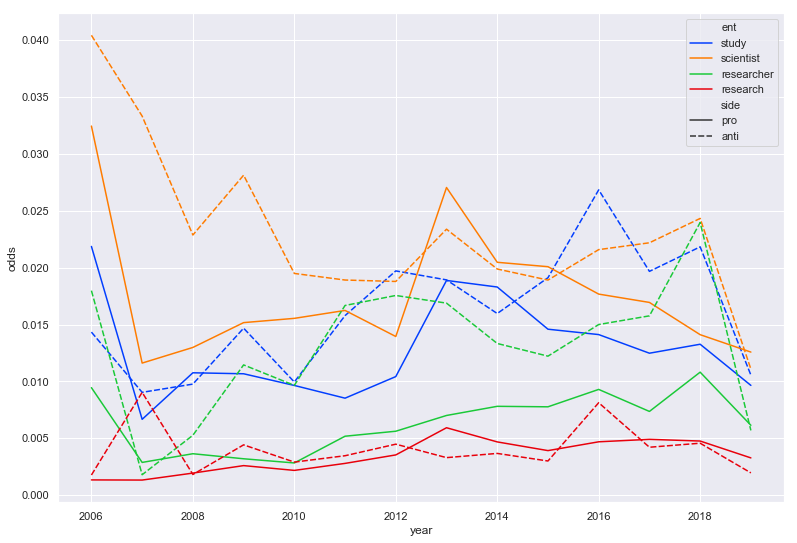

In [663]:
get_subj_df_over_time(['study','scientist','researcher','research'])

# Verbs of op. attr. for studies

cc pro 4563
cc anti 2203
vax pro 552
vax anti 625
covid pro 1104
covid anti 949


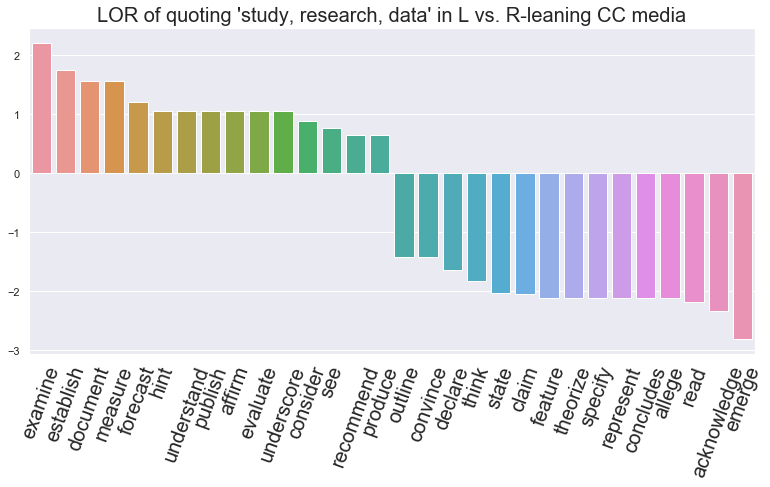

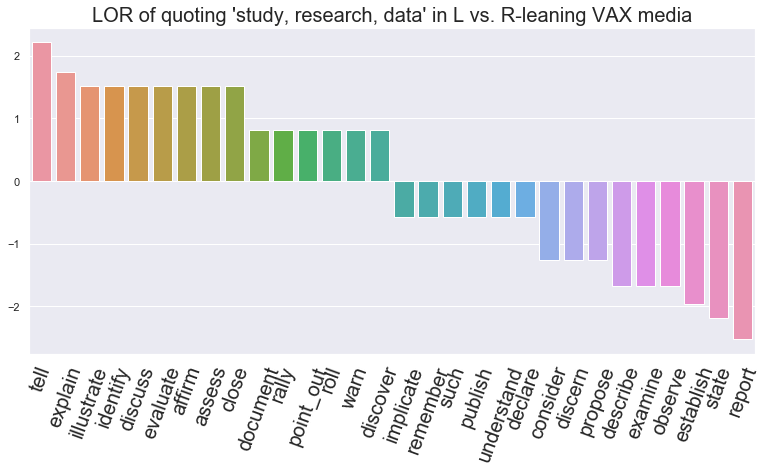

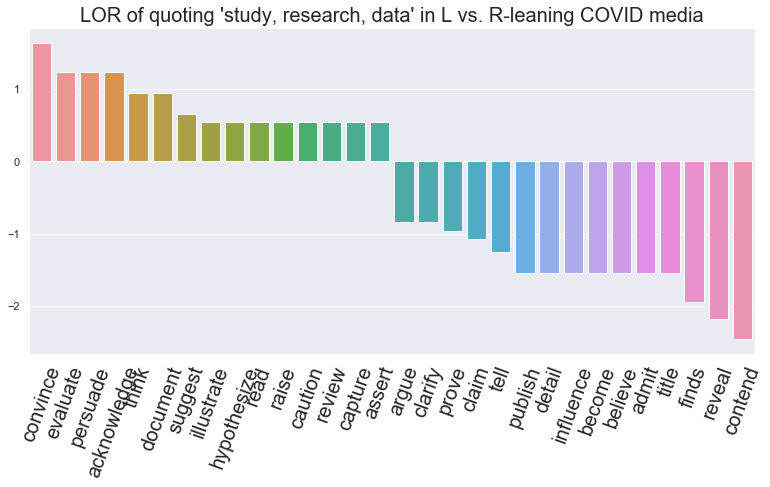

In [664]:
get_verbs_for_subj(['study','research','data'],topic_set=TOPICS,get_df=False)

In [ ]:
arg_verbs = ['argue','declare','contend']
claim_verbs = ['claim','allege']
admit_verbs = ['admit','acknowledge']
prove_verbs = ['prove']

# How studies are described

cc pro 546
cc anti 314


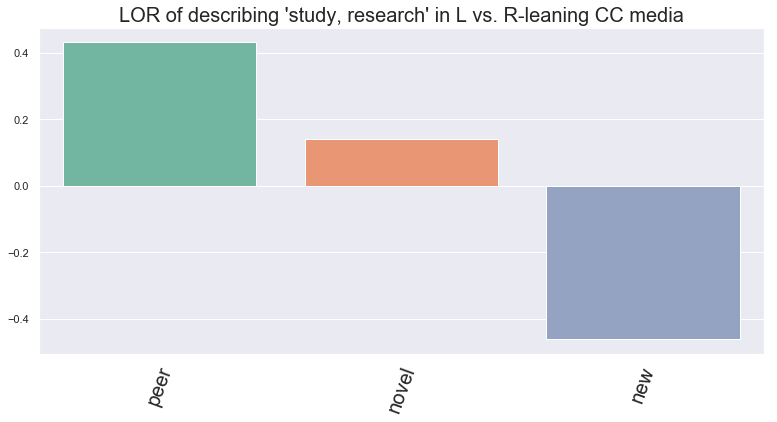

In [679]:
get_adjs_for_subj(['study','research'],['peer','novel','new'],topic_set=['cc'],get_df=False)

In [684]:
# study_subj_quotes = defaultdict(dict)
# for topic in ['cc','covid']:
#     for side in SIDES:
#         study_subj_quotes[topic][side] = [q for q in quotes_by_topic_side[topic][side] if q['main subject lemma coref'] is not None and \
#                         (q['main subject lemma coref'].lower() in ['study','research'] or \
#                        q['main subject text'].lower() in ['study','research'] or \
#                         (q['main subject lemma coref'].lower() in ent_fuzzy_map and \
#                          ent_fuzzy_map[q['main subject lemma coref'].lower()] in ['study','research']))]
#         print(topic,side,len(study_subj_quotes[topic][side]))

topic_side_study_subj_adj_toks = defaultdict(dict)
for topic in ['cc','covid']:
    for side in SIDES:
        adjs = [q['subject text'] for q in study_subj_quotes[topic][side]]
        topic_side_study_subj_adj_toks[topic][side] = [item.lower() for sublist in adjs for item in sublist]
        print(topic,side,len(topic_side_study_subj_adj_toks[topic][side]))

cc pro 20279
cc anti 9182
covid pro 4340
covid anti 3954


In [685]:
pr_study_quotes = defaultdict(dict)
for topic in ['cc','covid']:
    for side in SIDES:
        prs_ = [q for q in study_subj_quotes[topic][side] if 'peer' in q['subject text'] and 
               'reviewed' in q['subject text']]
        pr_study_quotes[topic][side] = prs_
        print(topic,side,len(prs_))

cc pro 32
cc anti 13
covid pro 7
covid anti 3


In [687]:
pr_study_quotes['cc']['anti']

[{'quote lemmas': ['the',
   'most',
   'important',
   'message',
   'of',
   'the',
   'calculation',
   'report',
   'here',
   'be',
   'that',
   'substitute',
   'natural',
   'gas',
   'for',
   'coal',
   'and',
   'oil',
   'be',
   'a',
   'significant',
   'way',
   'to',
   'reduce',
   'greenhouse',
   'force',
   ',',
   'regardless',
   'of',
   'how',
   'long',
   'the',
   'substitution',
   'take',
   ','],
  'quote lemmas coref': ['the',
   'most',
   'important',
   'message',
   'of',
   'the',
   'calculation',
   'report',
   'here',
   'be',
   'that',
   'substitute',
   'natural',
   'gas',
   'for',
   'coal',
   'and',
   'oil',
   'be',
   'a',
   'significant',
   'way',
   'to',
   'reduce',
   'greenhouse',
   'force',
   ',',
   'regardless',
   'of',
   'how',
   'long',
   'the',
   'substitution',
   'take',
   ','],
  'verb lemmas': ['say'],
  'verb lemmas coref': ['say'],
  'main verb lemma': 'say',
  'main verb lemma coref': 'say',
  'subject lem

In [688]:
pr_study_quotes['cc']['pro']

[{'quote lemmas': ['that',
   'the',
   'novel',
   'coronavirus',
   'have',
   'be',
   'spread',
   'most',
   'readily',
   'along',
   'an',
   'east',
   '-',
   'west',
   'band',
   'of',
   'the',
   'globe',
   'where',
   'the',
   'average',
   'temperature',
   'be',
   'between',
   '41',
   'and',
   '52',
   'degree',
   'and',
   'average',
   'humidity',
   'level'],
  'quote lemmas coref': ['that',
   'the novel coronavirus',
   'novel',
   'coronavirus',
   'have',
   'be',
   'spread',
   'most',
   'readily',
   'along',
   'an',
   'east',
   '-',
   'west',
   'band',
   'of',
   'the',
   'globe',
   'where',
   'the',
   'average',
   'temperature',
   'be',
   'between',
   '41',
   'and',
   '52',
   'degree',
   'and',
   'average',
   'humidity',
   'level'],
  'verb lemmas': ['show'],
  'verb lemmas coref': ['show'],
  'main verb lemma': 'show',
  'main verb lemma coref': 'show',
  'subject lemmas': ['a',
   'new',
   'study',
   ',',
   'which',
   'have

# Does each side simplify/essentialize the other side's arguments?

For example, does pro-cc news embed something along the lines of "climate change is a hoax" more than anti-cc news?

And does anti-cc news embed something along the lines of "the world is ending" more than pro-cc news?